## DSN AI Bootcamp Qualification Hackathon

### Introduction

#### Problem Statement
Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.

#### Objective
To predict customers who are likely to default or not.

#### Evaluation Metric
Area under the ROC Curve(AUC)

#### Variable Definitions
Application_ID: Unique Customer Application Identification number

#### Risk Scoring features:
    -form_field1: Customer Creditworthiness score based on historical data
    -form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.
    -Severity features: Severity is a function of amount, time since default, and number of defaults

    -form_field3: Severity of default by the borrower on any loan(s).
    -form_field4: Severity of default by the borrower on auto loan(s).
    -form_field5: Severity of default by the borrower on education loan(s).

#### Credit features
    -form_field6: Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
    -form_field7: Maximum of credit available on customer’s active credit lines (in NGN)
    -form_field8: Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
    -form_field9: Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)
    -form_field10: Total amount of credit available on accepted credit lines (in NGN)
    -form_field11: The amount of dues collected post-default where the due amount was more than 500 (in NGN)
    -form_field12: Sum of the amount due on active credit cards (in NGN)
    -form_field13: Annual amount paid towards all credit cards during the previous year (in NGN)
    -form_field14: Annual income (in NGN)
    -form_field15: The estimated market value of a property owned/used by the borrower (in NGN)

#### Credit card features:
    -form_field16: Number of active credit card that is automatically renewed as debts are paid off on which full credit limit is utilized by the borrower
    -form_field17: Number of active credit cards on which full credit limit is utilized by the borrower
    -form_field18: Number of active credit lines on which full credit limit is utilized by the borrower
    -form_field19: Number of active credit cards on which at least 75% credit limit is utilized by the borrower
    -form_field20: Number of active credit lines on which at least 75% credit limit is utilized by the borrower
    -form_field21: Average utilization of active revolving credit card loans (%)
    -form_field22: Average utilization of line on all active credit lines activated in last 2 years (%)
    -form_field23: Average utilization of line on all active credit cards activated in last 1 year (%)
    -form_field24: Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)
    -form_field25: Average tenure of active revolving credit cards (in days)
    -form_field26: Tenure of oldest credit card among all active credit cards (in days)
    -form_field27: Tenure of oldest revolving credit card among all active revolving credit cards (in days)
    
#### Time-related features
    -form_field28: Number of days since last missed payment on any credit line
    -form_field29: Tenure of the oldest credit line (in days)
    -form_field30: Maximum tenure on all auto loans (in days)
    -form_field31: Maximum tenure on all education loans (in days)
    -form_field32: Sum of tenures (in months) of active credit cards
    -form_field33: Sum of tenures (in months) of active credit cards
    -form_field34: Number of active credit lines over the last 6 months on which the borrower has missed 1 payment
    -form_field35: Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment
    -form_field36: Number of active credit lines
    -form_field37: Number of credit cards with an active tenure of at least 2 years
    -form_field38: Number of credit lines activated in the last 2 years
    -form_field39: Number of credit lines on which the borrower has current delinquency

#### Percentage related features
    -form_field40: Utilization of line on active education loans (%)
    -form_field41: Utilization of line on active auto loans (%)
    
#### Other features
    -form_field42: Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.
    -form_field43: Number of credit lines on which the borrower has never missed a payment in the last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario
    -form_field44: Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines
    -form_field45: Number of mortgage loans on which the borrower has missed 2 payments
    -form_field46: Number of auto loans on which the borrower has missed 2 payments
    -form_field47: Type of product that the applicant applied for. (C = Charge; L = Lending)
    -form_field48: Undefined Variable
    -form_field49: Undefined Variable
    -form_field50: Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines
    
#### Target features
    -default_status: defaulted or not. (yes:1, no: 0)

In [1]:
#Linear algebra
import numpy as np 
#Data processing
import pandas as pd
#Data visualisation
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings("ignore")

#Ml 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_auc_score, auc, classification_report

### Load in the Data and Examine
We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. Pandas has many methods to help make the data science/machine learning pipeline as smooth as possible.

In [2]:
#Load dataset
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [4]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [5]:
train.shape,test.shape

((56000, 52), (24000, 51))

### Categorical_features

In [6]:
categorical_features = (train.select_dtypes(include=['object']).columns.values)
categorical_features

array(['Applicant_ID', 'form_field47', 'default_status'], dtype=object)

### Numerical_features

In [7]:
numerical_features = train.select_dtypes(include=['float64','int64']).columns.values
numerical_features

array(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field48', 'form_field49',
       'form_field50'], dtype=object)

### Data Types and Missing Values
The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. 

In [8]:
print ("Rows     : " ,train.shape[0])
print ("Columns  : " ,train.shape[1])
print('\n')

#Dropping duplicates in the data
# using info method we can get quick overview of the dataset
train = train.drop_duplicates()
train.info()

print("\n------  Data type Count  ----- \n",train.dtypes.value_counts())

Rows     :  56000
Columns  :  52


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 

### Descriptive Analysis

In [9]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


### Missing values
We can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [10]:
def missing_values_table(train):
        # Total missing values
        mis_val = train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(train)

Your selected dataframe has 52 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
form_field40,43729,78.1
form_field31,39408,70.4
form_field41,38229,68.3
form_field11,31421,56.1
form_field45,31317,55.9
form_field23,28123,50.2
form_field30,25509,45.6
form_field35,23148,41.3
form_field15,22475,40.1
form_field48,20889,37.3


Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use. We will see how some machine learning models handle missing values as we go further in this project, for now let's do some exploratory data analysis!

### Exploratory Data Analysis

#### How many churners does the dataset have, and how many non-churners?

no     42285
yes    13715
Name: default_status, dtype: int64


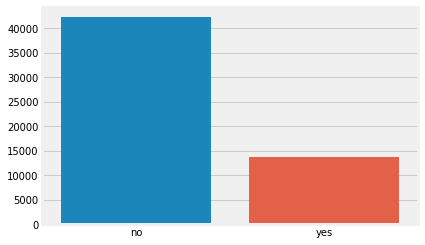

In [12]:
y = train["default_status"].value_counts()
print(y)
sns.barplot(y.index, y.values)

#### Some salient points to note:

    - It looks like there are far more Non-Churners than Churners in our dataset
    - Imbalanced data - Lesser datapoints in True Churn category

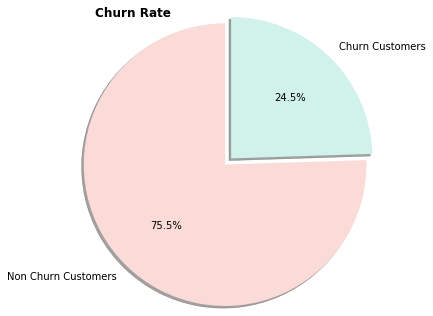

In [13]:
plt.figure(figsize=(10,5))
                         
color = ("#FADBD8", "#D1F2EB")
plt.pie(train["default_status"].value_counts(), data = train, explode=[0.08,0], labels=("Non Churn Customers", "Churn Customers"), 
        autopct="%1.1f%%", colors=color, shadow=True, startangle=90, radius=1.3)
plt.title("Churn Rate", loc="left", fontsize = 12, weight = 'bold')
plt.show()

#### Count the number of churners and non-churners by type of product that the applicant applied for(C = Charge,L = Lending)

In [14]:
print(train.groupby('form_field47')['default_status'].value_counts())

form_field47  default_status
charge        no                24846
              yes               11527
lending       no                17439
              yes                2188
Name: default_status, dtype: int64


Text(0.5, 1.0, 'Churn by Type of Product Applied for')

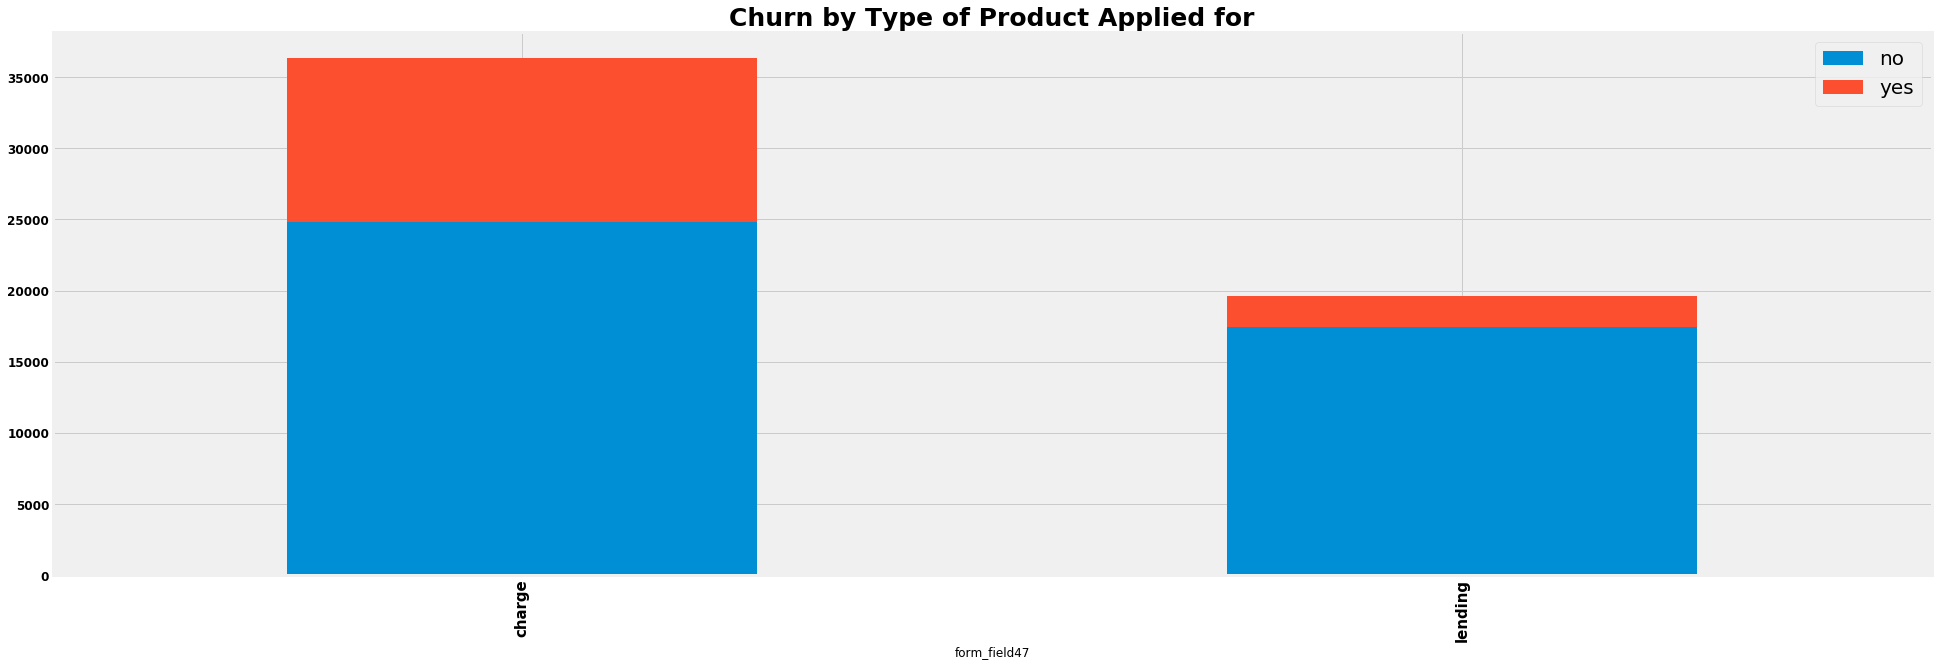

In [15]:
train.groupby(["form_field47", "default_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(weight = 'bold', fontsize = 15)
plt.yticks(weight = 'bold', fontsize = 12)
plt.legend(fontsize = 20)
plt.title("Churn by Type of Product Applied for" , weight = 'bold', fontsize = 25)

### Label Encoding

In [16]:
#Encoding the target variabe
train["default_status"] = LabelEncoder().fit_transform(train["default_status"])

In [17]:
train["form_field47"] = LabelEncoder().fit_transform(train["form_field47"])
test["form_field47"] = LabelEncoder().fit_transform(test["form_field47"])

### Some more data preprocessing

In [18]:
features = train.columns.drop(['Applicant_ID', 'default_status'])
X = pd.get_dummies(train[features])
y = train.default_status
test = pd.get_dummies(test[features])

### Model Building I

#### Split Into Training and Testing Sets
In machine learning, we always need to separate our features into two sets:

1. `Training set` which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
2. `Testing set` which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to get an estimate of how well our model will perform when deployed in the real world.

For our problem, we will split the data into 80% training set and 20% for testing.Let's do this!

Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.

In [19]:
#Create train and test split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [20]:
X_train.shape, X_test.shape

((44800, 50), (11200, 50))

Now let's create some custom functions to calculate the model's ROC-AUC score. To avoid overfitting the data, we will compare the model's prediction for the 20% test data to the actual test data for this project. Stay with me please,we are getting to the fun part.

In [21]:
def model_auc_score(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'Train AUC Score: {train_auc}, Test AUC Score: {test_auc}')

Below is a custom function to always plot the confusion matrix and roc curve of the model. Visuals they say, give answers to questions we didn't know we had. So why not paint a picture of our model?

In [22]:
def plot(model):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0], display_labels=["Will Pay", "Will Default"], cmap='Blues')
    plot_roc_curve(model,X_test, y_test, ax=ax[1])
    ax[0].set(title='Confusion Matrix')
    ax[1].set(title='ROC Curve')
    ax[0].grid(False)
    ax[1].grid(False)
    ax[1].legend(loc='center right')
    plt.tight_layout(pad=1.0)

### Model Building II

We will be using different variations of gradient boosting

#### Model 1 - Extreme Gradient Boosting( XGBoost) 

First to get the best parameters to use for this, we will use the `RandomizedSearchCV` object

In [23]:
# Instantiate the classifier: xgb
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()

In [54]:
#Set up the sample space
n_estimators_list = [50,100, 200, 300, 400, 500]
learning_rate_list = [0.0001, 0.001, 0.01, 0.1]

# Create the parameter distribution: xgb_param_dist
xgb_param_dist = {
    'learning_rate':learning_rate_list,
    'colsample_bytree': [0.1, 0.3,0.5,0.7],
    'n_estimators': n_estimators_list,
    'max_depth': [2,5,6,7]}
str_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Perform Random search: random_auc
random_search = RandomizedSearchCV(estimator=clf_xgb, param_distributions=xgb_param_dist,n_jobs=4,scoring='roc_auc',cv=str_kf,verbose=1)
random_result = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  7.7min finished


In [53]:
print(f"Best: {random_result.best_score_} using {random_result.best_params_}")
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Best: 0.8343988905523393 using {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [24]:
import xgboost as xgb
from sklearn.metrics import log_loss
pred_score_xgb = []
test_pred_xgb = []
splits = None
str_kf = StratifiedKFold(n_splits = 5,shuffle=True,random_state=6758)

for train_index,test_index in str_kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    clf_xgb = xgb.XGBClassifier(objective='binary:logistic',n_estimators = 500,max_depth= 5, learning_rate= 0.1, colsample_bytree= 0.3,seed=980)
    clf_xgb.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
           early_stopping_rounds=100,verbose=True)
    
    pred_score_xgb = clf_xgb.predict_proba(X_test)[:,1]
    
    print('Logloss:', log_loss(y_test,pred_score_xgb),'*'*30)
    
    test_xgb = clf_xgb.predict_proba(test[X.columns])[:,1]
    
    test_pred_xgb.append(test_xgb)

[0]	validation_0-error:0.21420	validation_1-error:0.21482
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.21243	validation_1-error:0.21045
[2]	validation_0-error:0.20998	validation_1-error:0.21018
[3]	validation_0-error:0.20944	validation_1-error:0.20866
[4]	validation_0-error:0.20951	validation_1-error:0.20893
[5]	validation_0-error:0.20505	validation_1-error:0.20491
[6]	validation_0-error:0.20469	validation_1-error:0.20482
[7]	validation_0-error:0.20183	validation_1-error:0.20214
[8]	validation_0-error:0.20000	validation_1-error:0.19795
[9]	validation_0-error:0.19933	validation_1-error:0.19812
[10]	validation_0-error:0.19819	validation_1-error:0.19786
[11]	validation_0-error:0.19612	validation_1-error:0.19491
[12]	validation_0-error:0.19616	validation_1-error:0.19509
[13]	validation_0-error:0.19551	validation_1-error:0.19446
[14]	validation_0-erro

[136]	validation_0-error:0.16437	validation_1-error:0.18500
[137]	validation_0-error:0.16424	validation_1-error:0.18491
[138]	validation_0-error:0.16404	validation_1-error:0.18527
[139]	validation_0-error:0.16379	validation_1-error:0.18554
[140]	validation_0-error:0.16359	validation_1-error:0.18554
[141]	validation_0-error:0.16339	validation_1-error:0.18554
[142]	validation_0-error:0.16330	validation_1-error:0.18554
[143]	validation_0-error:0.16317	validation_1-error:0.18598
[144]	validation_0-error:0.16315	validation_1-error:0.18589
[145]	validation_0-error:0.16308	validation_1-error:0.18563
[146]	validation_0-error:0.16304	validation_1-error:0.18571
[147]	validation_0-error:0.16299	validation_1-error:0.18563
[148]	validation_0-error:0.16272	validation_1-error:0.18589
[149]	validation_0-error:0.16257	validation_1-error:0.18580
[150]	validation_0-error:0.16248	validation_1-error:0.18571
[151]	validation_0-error:0.16234	validation_1-error:0.18571
[152]	validation_0-error:0.16225	validat

[40]	validation_0-error:0.18270	validation_1-error:0.19009
[41]	validation_0-error:0.18270	validation_1-error:0.19027
[42]	validation_0-error:0.18286	validation_1-error:0.19000
[43]	validation_0-error:0.18259	validation_1-error:0.19036
[44]	validation_0-error:0.18257	validation_1-error:0.19062
[45]	validation_0-error:0.18219	validation_1-error:0.19062
[46]	validation_0-error:0.18152	validation_1-error:0.19018
[47]	validation_0-error:0.18118	validation_1-error:0.19000
[48]	validation_0-error:0.18098	validation_1-error:0.18991
[49]	validation_0-error:0.18060	validation_1-error:0.19000
[50]	validation_0-error:0.18027	validation_1-error:0.19027
[51]	validation_0-error:0.18025	validation_1-error:0.19018
[52]	validation_0-error:0.18020	validation_1-error:0.19054
[53]	validation_0-error:0.18002	validation_1-error:0.19071
[54]	validation_0-error:0.17951	validation_1-error:0.19062
[55]	validation_0-error:0.17911	validation_1-error:0.19134
[56]	validation_0-error:0.17913	validation_1-error:0.191

[178]	validation_0-error:0.15998	validation_1-error:0.19036
[179]	validation_0-error:0.16000	validation_1-error:0.19071
[180]	validation_0-error:0.16004	validation_1-error:0.19009
[181]	validation_0-error:0.15998	validation_1-error:0.19009
[182]	validation_0-error:0.15980	validation_1-error:0.19036
[183]	validation_0-error:0.15969	validation_1-error:0.19071
[184]	validation_0-error:0.15953	validation_1-error:0.19089
[185]	validation_0-error:0.15942	validation_1-error:0.19071
[186]	validation_0-error:0.15931	validation_1-error:0.19071
[187]	validation_0-error:0.15922	validation_1-error:0.19071
Stopping. Best iteration:
[87]	validation_0-error:0.17275	validation_1-error:0.18893

Logloss: 0.40647112518912765 ******************************
[0]	validation_0-error:0.21574	validation_1-error:0.21616
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.21335	val

[124]	validation_0-error:0.16493	validation_1-error:0.18661
[125]	validation_0-error:0.16484	validation_1-error:0.18696
[126]	validation_0-error:0.16487	validation_1-error:0.18670
[127]	validation_0-error:0.16473	validation_1-error:0.18723
[128]	validation_0-error:0.16453	validation_1-error:0.18750
[129]	validation_0-error:0.16437	validation_1-error:0.18714
[130]	validation_0-error:0.16429	validation_1-error:0.18723
[131]	validation_0-error:0.16415	validation_1-error:0.18750
[132]	validation_0-error:0.16373	validation_1-error:0.18750
[133]	validation_0-error:0.16377	validation_1-error:0.18750
[134]	validation_0-error:0.16368	validation_1-error:0.18723
[135]	validation_0-error:0.16342	validation_1-error:0.18768
[136]	validation_0-error:0.16337	validation_1-error:0.18759
[137]	validation_0-error:0.16333	validation_1-error:0.18750
[138]	validation_0-error:0.16328	validation_1-error:0.18750
[139]	validation_0-error:0.16312	validation_1-error:0.18768
[140]	validation_0-error:0.16295	validat

[35]	validation_0-error:0.18315	validation_1-error:0.19786
[36]	validation_0-error:0.18281	validation_1-error:0.19786
[37]	validation_0-error:0.18257	validation_1-error:0.19759
[38]	validation_0-error:0.18248	validation_1-error:0.19732
[39]	validation_0-error:0.18196	validation_1-error:0.19732
[40]	validation_0-error:0.18179	validation_1-error:0.19625
[41]	validation_0-error:0.18161	validation_1-error:0.19634
[42]	validation_0-error:0.18125	validation_1-error:0.19670
[43]	validation_0-error:0.18123	validation_1-error:0.19670
[44]	validation_0-error:0.18094	validation_1-error:0.19714
[45]	validation_0-error:0.18049	validation_1-error:0.19696
[46]	validation_0-error:0.18031	validation_1-error:0.19696
[47]	validation_0-error:0.18025	validation_1-error:0.19714
[48]	validation_0-error:0.17980	validation_1-error:0.19679
[49]	validation_0-error:0.17982	validation_1-error:0.19643
[50]	validation_0-error:0.17971	validation_1-error:0.19589
[51]	validation_0-error:0.17929	validation_1-error:0.196

[173]	validation_0-error:0.15721	validation_1-error:0.19545
[174]	validation_0-error:0.15708	validation_1-error:0.19554
[175]	validation_0-error:0.15708	validation_1-error:0.19554
[176]	validation_0-error:0.15705	validation_1-error:0.19571
[177]	validation_0-error:0.15679	validation_1-error:0.19580
[178]	validation_0-error:0.15661	validation_1-error:0.19545
[179]	validation_0-error:0.15638	validation_1-error:0.19500
[180]	validation_0-error:0.15612	validation_1-error:0.19518
[181]	validation_0-error:0.15591	validation_1-error:0.19491
[182]	validation_0-error:0.15589	validation_1-error:0.19491
[183]	validation_0-error:0.15594	validation_1-error:0.19482
[184]	validation_0-error:0.15591	validation_1-error:0.19500
[185]	validation_0-error:0.15594	validation_1-error:0.19509
[186]	validation_0-error:0.15563	validation_1-error:0.19482
[187]	validation_0-error:0.15558	validation_1-error:0.19491
[188]	validation_0-error:0.15536	validation_1-error:0.19545
[189]	validation_0-error:0.15507	validat

[310]	validation_0-error:0.14085	validation_1-error:0.19384
[311]	validation_0-error:0.14067	validation_1-error:0.19402
[312]	validation_0-error:0.14056	validation_1-error:0.19402
[313]	validation_0-error:0.14049	validation_1-error:0.19402
[314]	validation_0-error:0.14022	validation_1-error:0.19411
[315]	validation_0-error:0.14025	validation_1-error:0.19402
[316]	validation_0-error:0.14020	validation_1-error:0.19393
[317]	validation_0-error:0.14020	validation_1-error:0.19411
[318]	validation_0-error:0.14013	validation_1-error:0.19402
[319]	validation_0-error:0.13993	validation_1-error:0.19375
[320]	validation_0-error:0.13975	validation_1-error:0.19357
[321]	validation_0-error:0.13971	validation_1-error:0.19366
[322]	validation_0-error:0.13962	validation_1-error:0.19339
[323]	validation_0-error:0.13960	validation_1-error:0.19304
[324]	validation_0-error:0.13933	validation_1-error:0.19321
[325]	validation_0-error:0.13931	validation_1-error:0.19312
[326]	validation_0-error:0.13915	validat

[7]	validation_0-error:0.19980	validation_1-error:0.21063
[8]	validation_0-error:0.19801	validation_1-error:0.20902
[9]	validation_0-error:0.19583	validation_1-error:0.20688
[10]	validation_0-error:0.19549	validation_1-error:0.20714
[11]	validation_0-error:0.19393	validation_1-error:0.20518
[12]	validation_0-error:0.19324	validation_1-error:0.20464
[13]	validation_0-error:0.19308	validation_1-error:0.20482
[14]	validation_0-error:0.19152	validation_1-error:0.20286
[15]	validation_0-error:0.19127	validation_1-error:0.20339
[16]	validation_0-error:0.19049	validation_1-error:0.20339
[17]	validation_0-error:0.19009	validation_1-error:0.20295
[18]	validation_0-error:0.18935	validation_1-error:0.20393
[19]	validation_0-error:0.18913	validation_1-error:0.20411
[20]	validation_0-error:0.18891	validation_1-error:0.20312
[21]	validation_0-error:0.18826	validation_1-error:0.20170
[22]	validation_0-error:0.18817	validation_1-error:0.20161
[23]	validation_0-error:0.18737	validation_1-error:0.20107


[146]	validation_0-error:0.16315	validation_1-error:0.19411
[147]	validation_0-error:0.16310	validation_1-error:0.19393
[148]	validation_0-error:0.16279	validation_1-error:0.19411
[149]	validation_0-error:0.16248	validation_1-error:0.19366
[150]	validation_0-error:0.16254	validation_1-error:0.19384
[151]	validation_0-error:0.16225	validation_1-error:0.19321
[152]	validation_0-error:0.16185	validation_1-error:0.19348
[153]	validation_0-error:0.16190	validation_1-error:0.19339
[154]	validation_0-error:0.16187	validation_1-error:0.19339
[155]	validation_0-error:0.16181	validation_1-error:0.19286
[156]	validation_0-error:0.16143	validation_1-error:0.19312
[157]	validation_0-error:0.16105	validation_1-error:0.19321
[158]	validation_0-error:0.16107	validation_1-error:0.19348
[159]	validation_0-error:0.16065	validation_1-error:0.19330
[160]	validation_0-error:0.16056	validation_1-error:0.19312
[161]	validation_0-error:0.16058	validation_1-error:0.19286
[162]	validation_0-error:0.16018	validat

[283]	validation_0-error:0.14609	validation_1-error:0.19223
[284]	validation_0-error:0.14578	validation_1-error:0.19250
[285]	validation_0-error:0.14580	validation_1-error:0.19241
[286]	validation_0-error:0.14578	validation_1-error:0.19241
[287]	validation_0-error:0.14576	validation_1-error:0.19268
[288]	validation_0-error:0.14571	validation_1-error:0.19268
[289]	validation_0-error:0.14567	validation_1-error:0.19268
[290]	validation_0-error:0.14574	validation_1-error:0.19232
[291]	validation_0-error:0.14571	validation_1-error:0.19241
[292]	validation_0-error:0.14569	validation_1-error:0.19241
[293]	validation_0-error:0.14558	validation_1-error:0.19214
[294]	validation_0-error:0.14545	validation_1-error:0.19205
[295]	validation_0-error:0.14527	validation_1-error:0.19179
[296]	validation_0-error:0.14522	validation_1-error:0.19179
[297]	validation_0-error:0.14489	validation_1-error:0.19187
[298]	validation_0-error:0.14471	validation_1-error:0.19196
[299]	validation_0-error:0.14471	validat

In [25]:
model_auc_score(clf_xgb)

Train AUC Score: 0.9045033743540427, Test AUC Score: 0.8328416434993504


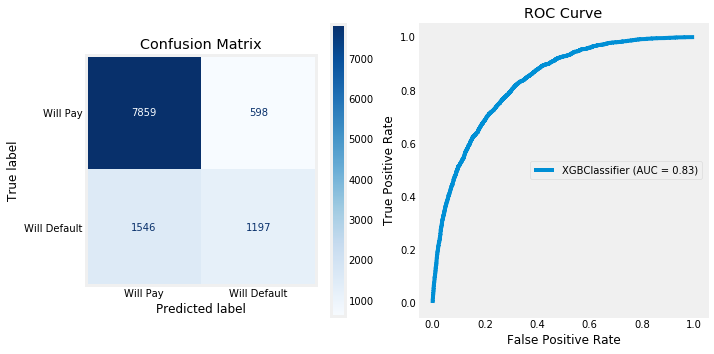

In [26]:
plot(clf_xgb)

`Overall validation prediction`

We could simply take the mean over all folds of the stratifiedKFold split. But the mean doesn't take into account the prediction deviation from one fold to another. Simply put, one fold could have a really high prediction compared to the other 4 folds since we made a split of 5. To minimize this error as much as possible, taking into consideration the worse case scenerio, we can do this;

In [27]:
predictions_xgb = np.mean(test_pred_xgb, axis=0) + np.std(test_pred_xgb, axis=0)
predictions_xgb

array([0.34639704, 0.45174146, 0.4003599 , ..., 0.2945803 , 0.53620005,
       0.20069036], dtype=float32)

In [28]:
print(classification_report(y_test,clf_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8457
           1       0.67      0.44      0.53      2743

    accuracy                           0.81     11200
   macro avg       0.75      0.68      0.70     11200
weighted avg       0.79      0.81      0.79     11200



#### Model 2 - Light Gradient Boosting Machine(LightGBM)

This was released by Microsoft in 2017. it's faster in training, more efficient and lighter in terms of space. In addition it handles missing values in its own way just like xgboost. How it handles missing values is a topic for another project. So let's go!

In [29]:
import lightgbm as lgb
pred_score_lgb = []
test_pred_lgb = []
splits = None
str_kf = StratifiedKFold(n_splits = 5,shuffle=True,random_state=8091)

for train_index,test_index in str_kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    clf_lgb = lgb.LGBMClassifier(silent=True,random_state= 1091)
    clf_lgb.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
           early_stopping_rounds=100, eval_metric='AUC',verbose=True)
    
    pred_score_lgb = clf_lgb.predict_proba(X_test)[:,1]
    
    print('Logloss:', log_loss(y_test,pred_score_lgb),'*'*30)
    
    test_lgb = clf_lgb.predict_proba(test[X.columns])[:,1]
    
    test_pred_lgb.append(test_lgb)

[1]	training's auc: 0.812897	training's binary_logloss: 0.533468	valid_1's auc: 0.803934	valid_1's binary_logloss: 0.534135
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.822119	training's binary_logloss: 0.51501	valid_1's auc: 0.811826	valid_1's binary_logloss: 0.516462
[3]	training's auc: 0.82665	training's binary_logloss: 0.499924	valid_1's auc: 0.813844	valid_1's binary_logloss: 0.502421
[4]	training's auc: 0.828603	training's binary_logloss: 0.487426	valid_1's auc: 0.815692	valid_1's binary_logloss: 0.490797
[5]	training's auc: 0.830083	training's binary_logloss: 0.476836	valid_1's auc: 0.817028	valid_1's binary_logloss: 0.480921
[6]	training's auc: 0.831566	training's binary_logloss: 0.467824	valid_1's auc: 0.818136	valid_1's binary_logloss: 0.472688
[7]	training's auc: 0.833476	training's binary_logloss: 0.45978	valid_1's auc: 0.820181	valid_1's binary_logloss: 0.465208
[8]	training's auc: 0.835745	training's binary_logloss: 0.452724	valid_1'

[32]	training's auc: 0.856458	training's binary_logloss: 0.393074	valid_1's auc: 0.831956	valid_1's binary_logloss: 0.415376
[33]	training's auc: 0.857034	training's binary_logloss: 0.39211	valid_1's auc: 0.832137	valid_1's binary_logloss: 0.414965
[34]	training's auc: 0.857767	training's binary_logloss: 0.391187	valid_1's auc: 0.832345	valid_1's binary_logloss: 0.414662
[35]	training's auc: 0.85839	training's binary_logloss: 0.390314	valid_1's auc: 0.832437	valid_1's binary_logloss: 0.414418
[36]	training's auc: 0.859028	training's binary_logloss: 0.389373	valid_1's auc: 0.832931	valid_1's binary_logloss: 0.413773
[37]	training's auc: 0.859561	training's binary_logloss: 0.388581	valid_1's auc: 0.832911	valid_1's binary_logloss: 0.413627
[38]	training's auc: 0.860099	training's binary_logloss: 0.387731	valid_1's auc: 0.833281	valid_1's binary_logloss: 0.413195
[39]	training's auc: 0.860931	training's binary_logloss: 0.386776	valid_1's auc: 0.83369	valid_1's binary_logloss: 0.412735
[40

Logloss: 0.41073247764146864 ******************************
[1]	training's auc: 0.812878	training's binary_logloss: 0.533461	valid_1's auc: 0.805598	valid_1's binary_logloss: 0.534264
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.819499	training's binary_logloss: 0.515279	valid_1's auc: 0.811494	valid_1's binary_logloss: 0.516801
[3]	training's auc: 0.823341	training's binary_logloss: 0.500273	valid_1's auc: 0.815337	valid_1's binary_logloss: 0.502357
[4]	training's auc: 0.826256	training's binary_logloss: 0.487773	valid_1's auc: 0.817994	valid_1's binary_logloss: 0.490535
[5]	training's auc: 0.828391	training's binary_logloss: 0.477117	valid_1's auc: 0.81909	valid_1's binary_logloss: 0.480659
[6]	training's auc: 0.830993	training's binary_logloss: 0.467849	valid_1's auc: 0.820673	valid_1's binary_logloss: 0.472233
[7]	training's auc: 0.832693	training's binary_logloss: 0.46001	valid_1's auc: 0.821126	valid_1's binary_logloss: 0.465378
[8]	training

[71]	training's auc: 0.879413	training's binary_logloss: 0.365416	valid_1's auc: 0.836234	valid_1's binary_logloss: 0.41048
[72]	training's auc: 0.879939	training's binary_logloss: 0.364815	valid_1's auc: 0.83644	valid_1's binary_logloss: 0.410314
[73]	training's auc: 0.880465	training's binary_logloss: 0.36425	valid_1's auc: 0.83647	valid_1's binary_logloss: 0.410305
[74]	training's auc: 0.880912	training's binary_logloss: 0.363791	valid_1's auc: 0.836526	valid_1's binary_logloss: 0.41024
[75]	training's auc: 0.881469	training's binary_logloss: 0.363226	valid_1's auc: 0.836465	valid_1's binary_logloss: 0.410296
[76]	training's auc: 0.881911	training's binary_logloss: 0.362699	valid_1's auc: 0.83645	valid_1's binary_logloss: 0.410326
[77]	training's auc: 0.882426	training's binary_logloss: 0.362166	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.410318
[78]	training's auc: 0.882811	training's binary_logloss: 0.361686	valid_1's auc: 0.836462	valid_1's binary_logloss: 0.410332
[79]	t

[40]	training's auc: 0.862207	training's binary_logloss: 0.385681	valid_1's auc: 0.836755	valid_1's binary_logloss: 0.409743
[41]	training's auc: 0.862821	training's binary_logloss: 0.384914	valid_1's auc: 0.836795	valid_1's binary_logloss: 0.409622
[42]	training's auc: 0.86341	training's binary_logloss: 0.38415	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.409363
[43]	training's auc: 0.864068	training's binary_logloss: 0.38335	valid_1's auc: 0.837025	valid_1's binary_logloss: 0.409223
[44]	training's auc: 0.864721	training's binary_logloss: 0.382555	valid_1's auc: 0.837384	valid_1's binary_logloss: 0.4088
[45]	training's auc: 0.865402	training's binary_logloss: 0.381788	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.408705
[46]	training's auc: 0.866059	training's binary_logloss: 0.381044	valid_1's auc: 0.837391	valid_1's binary_logloss: 0.408729
[47]	training's auc: 0.866661	training's binary_logloss: 0.380334	valid_1's auc: 0.837408	valid_1's binary_logloss: 0.408665
[48]	t

[8]	training's auc: 0.832337	training's binary_logloss: 0.454229	valid_1's auc: 0.827849	valid_1's binary_logloss: 0.456917
[9]	training's auc: 0.833472	training's binary_logloss: 0.448358	valid_1's auc: 0.829047	valid_1's binary_logloss: 0.451251
[10]	training's auc: 0.835303	training's binary_logloss: 0.442939	valid_1's auc: 0.830284	valid_1's binary_logloss: 0.446285
[11]	training's auc: 0.836627	training's binary_logloss: 0.438198	valid_1's auc: 0.831029	valid_1's binary_logloss: 0.442086
[12]	training's auc: 0.837955	training's binary_logloss: 0.433916	valid_1's auc: 0.832123	valid_1's binary_logloss: 0.438056
[13]	training's auc: 0.83912	training's binary_logloss: 0.430037	valid_1's auc: 0.83324	valid_1's binary_logloss: 0.434419
[14]	training's auc: 0.840105	training's binary_logloss: 0.426655	valid_1's auc: 0.834002	valid_1's binary_logloss: 0.431348
[15]	training's auc: 0.841277	training's binary_logloss: 0.423464	valid_1's auc: 0.83475	valid_1's binary_logloss: 0.428558
[16]	

[75]	training's auc: 0.879628	training's binary_logloss: 0.365327	valid_1's auc: 0.844729	valid_1's binary_logloss: 0.401392
[76]	training's auc: 0.880053	training's binary_logloss: 0.364831	valid_1's auc: 0.844786	valid_1's binary_logloss: 0.401371
[77]	training's auc: 0.880421	training's binary_logloss: 0.364375	valid_1's auc: 0.844793	valid_1's binary_logloss: 0.401346
[78]	training's auc: 0.880813	training's binary_logloss: 0.363944	valid_1's auc: 0.844798	valid_1's binary_logloss: 0.401339
[79]	training's auc: 0.881263	training's binary_logloss: 0.363414	valid_1's auc: 0.844786	valid_1's binary_logloss: 0.401341
[80]	training's auc: 0.881672	training's binary_logloss: 0.362958	valid_1's auc: 0.844792	valid_1's binary_logloss: 0.401318
[81]	training's auc: 0.882164	training's binary_logloss: 0.362454	valid_1's auc: 0.844937	valid_1's binary_logloss: 0.401153
[82]	training's auc: 0.882622	training's binary_logloss: 0.361931	valid_1's auc: 0.844821	valid_1's binary_logloss: 0.401296


Now that was fast!. Let's see how well it performs

In [30]:
model_auc_score(clf_lgb)

Train AUC Score: 0.8912902244508482, Test AUC Score: 0.8447851456388651


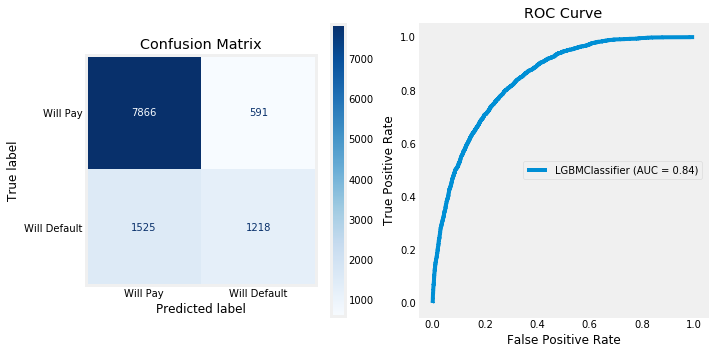

In [31]:
plot(clf_lgb)

`Overall Validation Prediction`

In [32]:
predictions_lgb = np.mean(test_pred_lgb, axis=0) + np.std(test_pred_lgb, axis=0)
predictions_lgb

array([0.34162557, 0.48025116, 0.43702681, ..., 0.2745789 , 0.55250276,
       0.18455259])

In [33]:
print(classification_report(y_test,clf_lgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8457
           1       0.67      0.44      0.54      2743

    accuracy                           0.81     11200
   macro avg       0.76      0.69      0.71     11200
weighted avg       0.80      0.81      0.80     11200



#### Model 3 - Categorical Boosting(CatBoost)

Open sourced by Yandex in april 2017.   
Built in handling of categorical features and missing values.  
Accurate and robust.  
Fast and Scalable.
    
    There's everything to love about this boosting algorithm!

In [34]:
from catboost import CatBoostClassifier
pred_score_cb = []
test_pred_cb = []
splits = None
str_kf = StratifiedKFold(n_splits = 5,shuffle= True, random_state=2920)

for train_index,test_index in str_kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    
    clf_cb = CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=9023)
    clf_cb.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
           early_stopping_rounds=100,verbose=True)
    
    pred_score_cb = clf_cb.predict_proba(X_test)[:,1]
    
    print('Logloss:', log_loss(y_test,pred_score_cb),'*'*30)
    
    test_cb = clf_cb.predict_proba(test[X.columns])[:,1]
    
    test_pred_cb.append(test_cb)
    

0:	test: 0.8109057	test1: 0.8023103	best: 0.8023103 (0)	total: 301ms	remaining: 7m 30s
1:	test: 0.8174592	test1: 0.8102653	best: 0.8102653 (1)	total: 425ms	remaining: 5m 18s
2:	test: 0.8212988	test1: 0.8155882	best: 0.8155882 (2)	total: 568ms	remaining: 4m 43s
3:	test: 0.8230794	test1: 0.8172681	best: 0.8172681 (3)	total: 716ms	remaining: 4m 27s
4:	test: 0.8238860	test1: 0.8192466	best: 0.8192466 (4)	total: 878ms	remaining: 4m 22s
5:	test: 0.8246557	test1: 0.8205949	best: 0.8205949 (5)	total: 1.07s	remaining: 4m 27s
6:	test: 0.8245685	test1: 0.8199896	best: 0.8205949 (5)	total: 1.23s	remaining: 4m 22s
7:	test: 0.8255540	test1: 0.8206792	best: 0.8206792 (7)	total: 1.39s	remaining: 4m 19s
8:	test: 0.8263670	test1: 0.8207853	best: 0.8207853 (8)	total: 1.55s	remaining: 4m 17s
9:	test: 0.8268939	test1: 0.8210978	best: 0.8210978 (9)	total: 1.7s	remaining: 4m 12s
10:	test: 0.8273374	test1: 0.8217294	best: 0.8217294 (10)	total: 1.81s	remaining: 4m 5s
11:	test: 0.8276815	test1: 0.8213869	best: 

94:	test: 0.8367811	test1: 0.8267179	best: 0.8267179 (94)	total: 11.5s	remaining: 2m 50s
95:	test: 0.8368831	test1: 0.8268365	best: 0.8268365 (95)	total: 11.7s	remaining: 2m 50s
96:	test: 0.8369690	test1: 0.8269054	best: 0.8269054 (96)	total: 11.8s	remaining: 2m 50s
97:	test: 0.8370464	test1: 0.8269753	best: 0.8269753 (97)	total: 11.9s	remaining: 2m 50s
98:	test: 0.8371065	test1: 0.8269718	best: 0.8269753 (97)	total: 12s	remaining: 2m 50s
99:	test: 0.8371510	test1: 0.8270598	best: 0.8270598 (99)	total: 12.1s	remaining: 2m 49s
100:	test: 0.8372869	test1: 0.8271328	best: 0.8271328 (100)	total: 12.2s	remaining: 2m 49s
101:	test: 0.8373848	test1: 0.8272240	best: 0.8272240 (101)	total: 12.3s	remaining: 2m 49s
102:	test: 0.8374611	test1: 0.8272182	best: 0.8272240 (101)	total: 12.5s	remaining: 2m 49s
103:	test: 0.8375348	test1: 0.8272868	best: 0.8272868 (103)	total: 12.7s	remaining: 2m 50s
104:	test: 0.8376325	test1: 0.8272972	best: 0.8272972 (104)	total: 12.8s	remaining: 2m 50s
105:	test: 0.

186:	test: 0.8433514	test1: 0.8304831	best: 0.8305056 (185)	total: 23.1s	remaining: 2m 42s
187:	test: 0.8433879	test1: 0.8305111	best: 0.8305111 (187)	total: 23.2s	remaining: 2m 42s
188:	test: 0.8434450	test1: 0.8305741	best: 0.8305741 (188)	total: 23.3s	remaining: 2m 41s
189:	test: 0.8434914	test1: 0.8305856	best: 0.8305856 (189)	total: 23.4s	remaining: 2m 41s
190:	test: 0.8435380	test1: 0.8306154	best: 0.8306154 (190)	total: 23.6s	remaining: 2m 41s
191:	test: 0.8436053	test1: 0.8306144	best: 0.8306154 (190)	total: 23.7s	remaining: 2m 41s
192:	test: 0.8436512	test1: 0.8306480	best: 0.8306480 (192)	total: 23.8s	remaining: 2m 41s
193:	test: 0.8437045	test1: 0.8306488	best: 0.8306488 (193)	total: 23.9s	remaining: 2m 40s
194:	test: 0.8437645	test1: 0.8306494	best: 0.8306494 (194)	total: 24.1s	remaining: 2m 40s
195:	test: 0.8438322	test1: 0.8306796	best: 0.8306796 (195)	total: 24.2s	remaining: 2m 40s
196:	test: 0.8438894	test1: 0.8306972	best: 0.8306972 (196)	total: 24.3s	remaining: 2m 40s

277:	test: 0.8480555	test1: 0.8322908	best: 0.8322908 (277)	total: 33.8s	remaining: 2m 28s
278:	test: 0.8481376	test1: 0.8323087	best: 0.8323087 (278)	total: 33.9s	remaining: 2m 28s
279:	test: 0.8481950	test1: 0.8323314	best: 0.8323314 (279)	total: 34s	remaining: 2m 28s
280:	test: 0.8482157	test1: 0.8323438	best: 0.8323438 (280)	total: 34.1s	remaining: 2m 27s
281:	test: 0.8482704	test1: 0.8323449	best: 0.8323449 (281)	total: 34.2s	remaining: 2m 27s
282:	test: 0.8483159	test1: 0.8323545	best: 0.8323545 (282)	total: 34.3s	remaining: 2m 27s
283:	test: 0.8483696	test1: 0.8323836	best: 0.8323836 (283)	total: 34.4s	remaining: 2m 27s
284:	test: 0.8484296	test1: 0.8324089	best: 0.8324089 (284)	total: 34.5s	remaining: 2m 27s
285:	test: 0.8484664	test1: 0.8324269	best: 0.8324269 (285)	total: 34.6s	remaining: 2m 27s
286:	test: 0.8485052	test1: 0.8324296	best: 0.8324296 (286)	total: 34.7s	remaining: 2m 26s
287:	test: 0.8485611	test1: 0.8324657	best: 0.8324657 (287)	total: 34.8s	remaining: 2m 26s
2

368:	test: 0.8521603	test1: 0.8335623	best: 0.8335623 (368)	total: 44.2s	remaining: 2m 15s
369:	test: 0.8522049	test1: 0.8335554	best: 0.8335623 (368)	total: 44.3s	remaining: 2m 15s
370:	test: 0.8522300	test1: 0.8335736	best: 0.8335736 (370)	total: 44.4s	remaining: 2m 15s
371:	test: 0.8522654	test1: 0.8335884	best: 0.8335884 (371)	total: 44.5s	remaining: 2m 14s
372:	test: 0.8523096	test1: 0.8336144	best: 0.8336144 (372)	total: 44.6s	remaining: 2m 14s
373:	test: 0.8523397	test1: 0.8336383	best: 0.8336383 (373)	total: 44.7s	remaining: 2m 14s
374:	test: 0.8523828	test1: 0.8336372	best: 0.8336383 (373)	total: 44.8s	remaining: 2m 14s
375:	test: 0.8524211	test1: 0.8336523	best: 0.8336523 (375)	total: 44.9s	remaining: 2m 14s
376:	test: 0.8524734	test1: 0.8336845	best: 0.8336845 (376)	total: 45s	remaining: 2m 14s
377:	test: 0.8525222	test1: 0.8337024	best: 0.8337024 (377)	total: 45.1s	remaining: 2m 13s
378:	test: 0.8525620	test1: 0.8337180	best: 0.8337180 (378)	total: 45.3s	remaining: 2m 13s
3

459:	test: 0.8558508	test1: 0.8345783	best: 0.8345783 (459)	total: 55s	remaining: 2m 4s
460:	test: 0.8559050	test1: 0.8345773	best: 0.8345783 (459)	total: 55.2s	remaining: 2m 4s
461:	test: 0.8559563	test1: 0.8345859	best: 0.8345859 (461)	total: 55.3s	remaining: 2m 4s
462:	test: 0.8559947	test1: 0.8346048	best: 0.8346048 (462)	total: 55.4s	remaining: 2m 4s
463:	test: 0.8560383	test1: 0.8346041	best: 0.8346048 (462)	total: 55.5s	remaining: 2m 3s
464:	test: 0.8560660	test1: 0.8346097	best: 0.8346097 (464)	total: 55.6s	remaining: 2m 3s
465:	test: 0.8560925	test1: 0.8346241	best: 0.8346241 (465)	total: 55.7s	remaining: 2m 3s
466:	test: 0.8561233	test1: 0.8346355	best: 0.8346355 (466)	total: 55.8s	remaining: 2m 3s
467:	test: 0.8561728	test1: 0.8346460	best: 0.8346460 (467)	total: 55.9s	remaining: 2m 3s
468:	test: 0.8561933	test1: 0.8346353	best: 0.8346460 (467)	total: 56s	remaining: 2m 3s
469:	test: 0.8562405	test1: 0.8346503	best: 0.8346503 (469)	total: 56.1s	remaining: 2m 2s
470:	test: 0.8

551:	test: 0.8594084	test1: 0.8353735	best: 0.8353735 (551)	total: 1m 5s	remaining: 1m 52s
552:	test: 0.8594320	test1: 0.8353903	best: 0.8353903 (552)	total: 1m 5s	remaining: 1m 52s
553:	test: 0.8594615	test1: 0.8354082	best: 0.8354082 (553)	total: 1m 5s	remaining: 1m 52s
554:	test: 0.8594914	test1: 0.8354200	best: 0.8354200 (554)	total: 1m 5s	remaining: 1m 52s
555:	test: 0.8595439	test1: 0.8354359	best: 0.8354359 (555)	total: 1m 6s	remaining: 1m 52s
556:	test: 0.8595642	test1: 0.8354355	best: 0.8354359 (555)	total: 1m 6s	remaining: 1m 52s
557:	test: 0.8595991	test1: 0.8354474	best: 0.8354474 (557)	total: 1m 6s	remaining: 1m 52s
558:	test: 0.8596427	test1: 0.8354617	best: 0.8354617 (558)	total: 1m 6s	remaining: 1m 51s
559:	test: 0.8596725	test1: 0.8354674	best: 0.8354674 (559)	total: 1m 6s	remaining: 1m 51s
560:	test: 0.8596999	test1: 0.8354675	best: 0.8354675 (560)	total: 1m 6s	remaining: 1m 51s
561:	test: 0.8597346	test1: 0.8354869	best: 0.8354869 (561)	total: 1m 6s	remaining: 1m 51s

641:	test: 0.8626114	test1: 0.8359574	best: 0.8359574 (641)	total: 1m 16s	remaining: 1m 41s
642:	test: 0.8626376	test1: 0.8359573	best: 0.8359574 (641)	total: 1m 16s	remaining: 1m 41s
643:	test: 0.8626708	test1: 0.8359756	best: 0.8359756 (643)	total: 1m 16s	remaining: 1m 41s
644:	test: 0.8626871	test1: 0.8359816	best: 0.8359816 (644)	total: 1m 16s	remaining: 1m 41s
645:	test: 0.8627187	test1: 0.8359876	best: 0.8359876 (645)	total: 1m 16s	remaining: 1m 41s
646:	test: 0.8627408	test1: 0.8359943	best: 0.8359943 (646)	total: 1m 16s	remaining: 1m 40s
647:	test: 0.8627652	test1: 0.8360044	best: 0.8360044 (647)	total: 1m 16s	remaining: 1m 40s
648:	test: 0.8627858	test1: 0.8360119	best: 0.8360119 (648)	total: 1m 16s	remaining: 1m 40s
649:	test: 0.8628327	test1: 0.8360240	best: 0.8360240 (649)	total: 1m 16s	remaining: 1m 40s
650:	test: 0.8628428	test1: 0.8360188	best: 0.8360240 (649)	total: 1m 16s	remaining: 1m 40s
651:	test: 0.8628894	test1: 0.8360211	best: 0.8360240 (649)	total: 1m 17s	remain

733:	test: 0.8657687	test1: 0.8364146	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 30s
734:	test: 0.8658334	test1: 0.8364096	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 30s
735:	test: 0.8658534	test1: 0.8364086	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 29s
736:	test: 0.8658968	test1: 0.8364093	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 29s
737:	test: 0.8659276	test1: 0.8364131	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 29s
738:	test: 0.8659423	test1: 0.8364097	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 29s
739:	test: 0.8660007	test1: 0.8364051	best: 0.8364179 (732)	total: 1m 26s	remaining: 1m 29s
740:	test: 0.8660087	test1: 0.8364031	best: 0.8364179 (732)	total: 1m 27s	remaining: 1m 29s
741:	test: 0.8660374	test1: 0.8364039	best: 0.8364179 (732)	total: 1m 27s	remaining: 1m 29s
742:	test: 0.8660697	test1: 0.8364191	best: 0.8364191 (742)	total: 1m 27s	remaining: 1m 28s
743:	test: 0.8661025	test1: 0.8364229	best: 0.8364229 (743)	total: 1m 27s	remain

823:	test: 0.8688478	test1: 0.8367200	best: 0.8367308 (822)	total: 1m 36s	remaining: 1m 19s
824:	test: 0.8688707	test1: 0.8367272	best: 0.8367308 (822)	total: 1m 36s	remaining: 1m 19s
825:	test: 0.8688931	test1: 0.8367298	best: 0.8367308 (822)	total: 1m 37s	remaining: 1m 19s
826:	test: 0.8689132	test1: 0.8367321	best: 0.8367321 (826)	total: 1m 37s	remaining: 1m 19s
827:	test: 0.8689481	test1: 0.8367335	best: 0.8367335 (827)	total: 1m 37s	remaining: 1m 18s
828:	test: 0.8689672	test1: 0.8367341	best: 0.8367341 (828)	total: 1m 37s	remaining: 1m 18s
829:	test: 0.8689880	test1: 0.8367421	best: 0.8367421 (829)	total: 1m 37s	remaining: 1m 18s
830:	test: 0.8690207	test1: 0.8367496	best: 0.8367496 (830)	total: 1m 37s	remaining: 1m 18s
831:	test: 0.8690598	test1: 0.8367597	best: 0.8367597 (831)	total: 1m 37s	remaining: 1m 18s
832:	test: 0.8691038	test1: 0.8367681	best: 0.8367681 (832)	total: 1m 37s	remaining: 1m 18s
833:	test: 0.8691154	test1: 0.8367617	best: 0.8367681 (832)	total: 1m 37s	remain

914:	test: 0.8717608	test1: 0.8370516	best: 0.8370517 (913)	total: 1m 47s	remaining: 1m 8s
915:	test: 0.8717831	test1: 0.8370529	best: 0.8370529 (915)	total: 1m 47s	remaining: 1m 8s
916:	test: 0.8718086	test1: 0.8370492	best: 0.8370529 (915)	total: 1m 47s	remaining: 1m 8s
917:	test: 0.8718476	test1: 0.8370561	best: 0.8370561 (917)	total: 1m 47s	remaining: 1m 8s
918:	test: 0.8718680	test1: 0.8370547	best: 0.8370561 (917)	total: 1m 47s	remaining: 1m 8s
919:	test: 0.8718753	test1: 0.8370595	best: 0.8370595 (919)	total: 1m 47s	remaining: 1m 7s
920:	test: 0.8718954	test1: 0.8370645	best: 0.8370645 (920)	total: 1m 47s	remaining: 1m 7s
921:	test: 0.8719315	test1: 0.8370792	best: 0.8370792 (921)	total: 1m 48s	remaining: 1m 7s
922:	test: 0.8719723	test1: 0.8370919	best: 0.8370919 (922)	total: 1m 48s	remaining: 1m 7s
923:	test: 0.8720282	test1: 0.8371017	best: 0.8371017 (923)	total: 1m 48s	remaining: 1m 7s
924:	test: 0.8720416	test1: 0.8371012	best: 0.8371017 (923)	total: 1m 48s	remaining: 1m 7s

1005:	test: 0.8745266	test1: 0.8373833	best: 0.8373833 (1005)	total: 1m 57s	remaining: 57.6s
1006:	test: 0.8745645	test1: 0.8373862	best: 0.8373862 (1006)	total: 1m 57s	remaining: 57.5s
1007:	test: 0.8746011	test1: 0.8373997	best: 0.8373997 (1007)	total: 1m 57s	remaining: 57.3s
1008:	test: 0.8746327	test1: 0.8374022	best: 0.8374022 (1008)	total: 1m 57s	remaining: 57.2s
1009:	test: 0.8746499	test1: 0.8374002	best: 0.8374022 (1008)	total: 1m 57s	remaining: 57.1s
1010:	test: 0.8746787	test1: 0.8374105	best: 0.8374105 (1010)	total: 1m 57s	remaining: 57s
1011:	test: 0.8746911	test1: 0.8374060	best: 0.8374105 (1010)	total: 1m 58s	remaining: 56.9s
1012:	test: 0.8747181	test1: 0.8373969	best: 0.8374105 (1010)	total: 1m 58s	remaining: 56.8s
1013:	test: 0.8747512	test1: 0.8373887	best: 0.8374105 (1010)	total: 1m 58s	remaining: 56.7s
1014:	test: 0.8747768	test1: 0.8374017	best: 0.8374105 (1010)	total: 1m 58s	remaining: 56.6s
1015:	test: 0.8748034	test1: 0.8373957	best: 0.8374105 (1010)	total: 1m 

1095:	test: 0.8772607	test1: 0.8375847	best: 0.8375991 (1091)	total: 2m 7s	remaining: 47s
1096:	test: 0.8772984	test1: 0.8375918	best: 0.8375991 (1091)	total: 2m 7s	remaining: 46.8s
1097:	test: 0.8773418	test1: 0.8375922	best: 0.8375991 (1091)	total: 2m 7s	remaining: 46.7s
1098:	test: 0.8773631	test1: 0.8376013	best: 0.8376013 (1098)	total: 2m 7s	remaining: 46.6s
1099:	test: 0.8774016	test1: 0.8376190	best: 0.8376190 (1099)	total: 2m 7s	remaining: 46.5s
1100:	test: 0.8774328	test1: 0.8376186	best: 0.8376190 (1099)	total: 2m 7s	remaining: 46.4s
1101:	test: 0.8774665	test1: 0.8376275	best: 0.8376275 (1101)	total: 2m 7s	remaining: 46.2s
1102:	test: 0.8774935	test1: 0.8376326	best: 0.8376326 (1102)	total: 2m 8s	remaining: 46.1s
1103:	test: 0.8775340	test1: 0.8376372	best: 0.8376372 (1103)	total: 2m 8s	remaining: 46s
1104:	test: 0.8775687	test1: 0.8376273	best: 0.8376372 (1103)	total: 2m 8s	remaining: 45.9s
1105:	test: 0.8775873	test1: 0.8376272	best: 0.8376372 (1103)	total: 2m 8s	remaining

1185:	test: 0.8803380	test1: 0.8378439	best: 0.8378439 (1185)	total: 2m 17s	remaining: 36.4s
1186:	test: 0.8803871	test1: 0.8378441	best: 0.8378441 (1186)	total: 2m 17s	remaining: 36.3s
1187:	test: 0.8804133	test1: 0.8378498	best: 0.8378498 (1187)	total: 2m 17s	remaining: 36.2s
1188:	test: 0.8804326	test1: 0.8378473	best: 0.8378498 (1187)	total: 2m 17s	remaining: 36.1s
1189:	test: 0.8804952	test1: 0.8378399	best: 0.8378498 (1187)	total: 2m 18s	remaining: 36s
1190:	test: 0.8805391	test1: 0.8378334	best: 0.8378498 (1187)	total: 2m 18s	remaining: 35.8s
1191:	test: 0.8805707	test1: 0.8378333	best: 0.8378498 (1187)	total: 2m 18s	remaining: 35.7s
1192:	test: 0.8805897	test1: 0.8378333	best: 0.8378498 (1187)	total: 2m 18s	remaining: 35.6s
1193:	test: 0.8806171	test1: 0.8378412	best: 0.8378498 (1187)	total: 2m 18s	remaining: 35.5s
1194:	test: 0.8806382	test1: 0.8378432	best: 0.8378498 (1187)	total: 2m 18s	remaining: 35.4s
1195:	test: 0.8807049	test1: 0.8378344	best: 0.8378498 (1187)	total: 2m 

1275:	test: 0.8833136	test1: 0.8379499	best: 0.8379605 (1259)	total: 2m 27s	remaining: 25.9s
1276:	test: 0.8833435	test1: 0.8379548	best: 0.8379605 (1259)	total: 2m 27s	remaining: 25.8s
1277:	test: 0.8833696	test1: 0.8379576	best: 0.8379605 (1259)	total: 2m 28s	remaining: 25.7s
1278:	test: 0.8833851	test1: 0.8379580	best: 0.8379605 (1259)	total: 2m 28s	remaining: 25.6s
1279:	test: 0.8834206	test1: 0.8379587	best: 0.8379605 (1259)	total: 2m 28s	remaining: 25.5s
1280:	test: 0.8834549	test1: 0.8379624	best: 0.8379624 (1280)	total: 2m 28s	remaining: 25.4s
1281:	test: 0.8834840	test1: 0.8379706	best: 0.8379706 (1281)	total: 2m 28s	remaining: 25.2s
1282:	test: 0.8835334	test1: 0.8379544	best: 0.8379706 (1281)	total: 2m 28s	remaining: 25.1s
1283:	test: 0.8835597	test1: 0.8379517	best: 0.8379706 (1281)	total: 2m 28s	remaining: 25s
1284:	test: 0.8835896	test1: 0.8379591	best: 0.8379706 (1281)	total: 2m 28s	remaining: 24.9s
1285:	test: 0.8836159	test1: 0.8379522	best: 0.8379706 (1281)	total: 2m 

1364:	test: 0.8861814	test1: 0.8379796	best: 0.8379833 (1363)	total: 2m 38s	remaining: 15.6s
1365:	test: 0.8862142	test1: 0.8379839	best: 0.8379839 (1365)	total: 2m 38s	remaining: 15.5s
1366:	test: 0.8862650	test1: 0.8379882	best: 0.8379882 (1366)	total: 2m 38s	remaining: 15.4s
1367:	test: 0.8863126	test1: 0.8379871	best: 0.8379882 (1366)	total: 2m 38s	remaining: 15.3s
1368:	test: 0.8863510	test1: 0.8379850	best: 0.8379882 (1366)	total: 2m 38s	remaining: 15.2s
1369:	test: 0.8863781	test1: 0.8379952	best: 0.8379952 (1369)	total: 2m 38s	remaining: 15.1s
1370:	test: 0.8864055	test1: 0.8379904	best: 0.8379952 (1369)	total: 2m 39s	remaining: 15s
1371:	test: 0.8864532	test1: 0.8380023	best: 0.8380023 (1371)	total: 2m 39s	remaining: 14.9s
1372:	test: 0.8864864	test1: 0.8380046	best: 0.8380046 (1372)	total: 2m 39s	remaining: 14.7s
1373:	test: 0.8865228	test1: 0.8379976	best: 0.8380046 (1372)	total: 2m 39s	remaining: 14.6s
1374:	test: 0.8865460	test1: 0.8380112	best: 0.8380112 (1374)	total: 2m 

1453:	test: 0.8891140	test1: 0.8380698	best: 0.8380698 (1453)	total: 2m 49s	remaining: 5.36s
1454:	test: 0.8891572	test1: 0.8380626	best: 0.8380698 (1453)	total: 2m 49s	remaining: 5.25s
1455:	test: 0.8891996	test1: 0.8380671	best: 0.8380698 (1453)	total: 2m 49s	remaining: 5.13s
1456:	test: 0.8892224	test1: 0.8380704	best: 0.8380704 (1456)	total: 2m 49s	remaining: 5.02s
1457:	test: 0.8892466	test1: 0.8380726	best: 0.8380726 (1457)	total: 2m 50s	remaining: 4.9s
1458:	test: 0.8892938	test1: 0.8380862	best: 0.8380862 (1458)	total: 2m 50s	remaining: 4.78s
1459:	test: 0.8893222	test1: 0.8380842	best: 0.8380862 (1458)	total: 2m 50s	remaining: 4.67s
1460:	test: 0.8893462	test1: 0.8381019	best: 0.8381019 (1460)	total: 2m 50s	remaining: 4.55s
1461:	test: 0.8893844	test1: 0.8381071	best: 0.8381071 (1461)	total: 2m 50s	remaining: 4.43s
1462:	test: 0.8894324	test1: 0.8381130	best: 0.8381130 (1462)	total: 2m 50s	remaining: 4.32s
1463:	test: 0.8894712	test1: 0.8381145	best: 0.8381145 (1463)	total: 2m

44:	test: 0.8317037	test1: 0.8194537	best: 0.8194595 (43)	total: 6.37s	remaining: 3m 25s
45:	test: 0.8318749	test1: 0.8196482	best: 0.8196482 (45)	total: 6.5s	remaining: 3m 25s
46:	test: 0.8319799	test1: 0.8198717	best: 0.8198717 (46)	total: 6.63s	remaining: 3m 24s
47:	test: 0.8319975	test1: 0.8198428	best: 0.8198717 (46)	total: 6.78s	remaining: 3m 25s
48:	test: 0.8320537	test1: 0.8198510	best: 0.8198717 (46)	total: 6.97s	remaining: 3m 26s
49:	test: 0.8321888	test1: 0.8199536	best: 0.8199536 (49)	total: 7.11s	remaining: 3m 26s
50:	test: 0.8322976	test1: 0.8199578	best: 0.8199578 (50)	total: 7.26s	remaining: 3m 26s
51:	test: 0.8323690	test1: 0.8199682	best: 0.8199682 (51)	total: 7.38s	remaining: 3m 25s
52:	test: 0.8325501	test1: 0.8201981	best: 0.8201981 (52)	total: 7.52s	remaining: 3m 25s
53:	test: 0.8325450	test1: 0.8201941	best: 0.8201981 (52)	total: 7.62s	remaining: 3m 24s
54:	test: 0.8326274	test1: 0.8202596	best: 0.8202596 (54)	total: 7.81s	remaining: 3m 25s
55:	test: 0.8327069	te

137:	test: 0.8398463	test1: 0.8259919	best: 0.8259919 (137)	total: 18.5s	remaining: 3m 2s
138:	test: 0.8399063	test1: 0.8260288	best: 0.8260288 (138)	total: 18.7s	remaining: 3m 2s
139:	test: 0.8399987	test1: 0.8260719	best: 0.8260719 (139)	total: 18.8s	remaining: 3m 2s
140:	test: 0.8400588	test1: 0.8260642	best: 0.8260719 (139)	total: 18.9s	remaining: 3m 2s
141:	test: 0.8401245	test1: 0.8261172	best: 0.8261172 (141)	total: 19.1s	remaining: 3m 2s
142:	test: 0.8402006	test1: 0.8261906	best: 0.8261906 (142)	total: 19.2s	remaining: 3m 2s
143:	test: 0.8403121	test1: 0.8262393	best: 0.8262393 (143)	total: 19.3s	remaining: 3m 1s
144:	test: 0.8403569	test1: 0.8262742	best: 0.8262742 (144)	total: 19.4s	remaining: 3m 1s
145:	test: 0.8404415	test1: 0.8263428	best: 0.8263428 (145)	total: 19.5s	remaining: 3m
146:	test: 0.8405556	test1: 0.8264471	best: 0.8264471 (146)	total: 19.6s	remaining: 3m
147:	test: 0.8406083	test1: 0.8264944	best: 0.8264944 (147)	total: 19.7s	remaining: 3m
148:	test: 0.840673

229:	test: 0.8455749	test1: 0.8297274	best: 0.8297274 (229)	total: 29.6s	remaining: 2m 43s
230:	test: 0.8456203	test1: 0.8297502	best: 0.8297502 (230)	total: 29.7s	remaining: 2m 43s
231:	test: 0.8456855	test1: 0.8297965	best: 0.8297965 (231)	total: 29.9s	remaining: 2m 43s
232:	test: 0.8457331	test1: 0.8298379	best: 0.8298379 (232)	total: 30.1s	remaining: 2m 43s
233:	test: 0.8457845	test1: 0.8298734	best: 0.8298734 (233)	total: 30.2s	remaining: 2m 43s
234:	test: 0.8458399	test1: 0.8299187	best: 0.8299187 (234)	total: 30.4s	remaining: 2m 43s
235:	test: 0.8458778	test1: 0.8299527	best: 0.8299527 (235)	total: 30.5s	remaining: 2m 43s
236:	test: 0.8459276	test1: 0.8299907	best: 0.8299907 (236)	total: 30.7s	remaining: 2m 43s
237:	test: 0.8459612	test1: 0.8300091	best: 0.8300091 (237)	total: 30.8s	remaining: 2m 43s
238:	test: 0.8460262	test1: 0.8300185	best: 0.8300185 (238)	total: 30.9s	remaining: 2m 42s
239:	test: 0.8460553	test1: 0.8300668	best: 0.8300668 (239)	total: 31s	remaining: 2m 42s
2

320:	test: 0.8500791	test1: 0.8319590	best: 0.8319590 (320)	total: 40.6s	remaining: 2m 29s
321:	test: 0.8501225	test1: 0.8319720	best: 0.8319720 (321)	total: 40.7s	remaining: 2m 29s
322:	test: 0.8501781	test1: 0.8319935	best: 0.8319935 (322)	total: 40.9s	remaining: 2m 29s
323:	test: 0.8502229	test1: 0.8319980	best: 0.8319980 (323)	total: 41s	remaining: 2m 28s
324:	test: 0.8502707	test1: 0.8320314	best: 0.8320314 (324)	total: 41.1s	remaining: 2m 28s
325:	test: 0.8503283	test1: 0.8320685	best: 0.8320685 (325)	total: 41.2s	remaining: 2m 28s
326:	test: 0.8503831	test1: 0.8320850	best: 0.8320850 (326)	total: 41.3s	remaining: 2m 28s
327:	test: 0.8504321	test1: 0.8321057	best: 0.8321057 (327)	total: 41.5s	remaining: 2m 28s
328:	test: 0.8504672	test1: 0.8321334	best: 0.8321334 (328)	total: 41.7s	remaining: 2m 28s
329:	test: 0.8505114	test1: 0.8321631	best: 0.8321631 (329)	total: 41.8s	remaining: 2m 28s
330:	test: 0.8505543	test1: 0.8321817	best: 0.8321817 (330)	total: 41.9s	remaining: 2m 28s
3

411:	test: 0.8542341	test1: 0.8336075	best: 0.8336075 (411)	total: 51.9s	remaining: 2m 17s
412:	test: 0.8542582	test1: 0.8336160	best: 0.8336160 (412)	total: 52s	remaining: 2m 16s
413:	test: 0.8543071	test1: 0.8336421	best: 0.8336421 (413)	total: 52.1s	remaining: 2m 16s
414:	test: 0.8543452	test1: 0.8336713	best: 0.8336713 (414)	total: 52.2s	remaining: 2m 16s
415:	test: 0.8543796	test1: 0.8336884	best: 0.8336884 (415)	total: 52.4s	remaining: 2m 16s
416:	test: 0.8544032	test1: 0.8337060	best: 0.8337060 (416)	total: 52.5s	remaining: 2m 16s
417:	test: 0.8544316	test1: 0.8337134	best: 0.8337134 (417)	total: 52.6s	remaining: 2m 16s
418:	test: 0.8544705	test1: 0.8337316	best: 0.8337316 (418)	total: 52.7s	remaining: 2m 16s
419:	test: 0.8545193	test1: 0.8337441	best: 0.8337441 (419)	total: 52.9s	remaining: 2m 15s
420:	test: 0.8545644	test1: 0.8337517	best: 0.8337517 (420)	total: 53s	remaining: 2m 15s
421:	test: 0.8546015	test1: 0.8337444	best: 0.8337517 (420)	total: 53.2s	remaining: 2m 15s
422

504:	test: 0.8579670	test1: 0.8347987	best: 0.8347987 (504)	total: 1m 3s	remaining: 2m 5s
505:	test: 0.8579973	test1: 0.8348117	best: 0.8348117 (505)	total: 1m 3s	remaining: 2m 4s
506:	test: 0.8580306	test1: 0.8348104	best: 0.8348117 (505)	total: 1m 3s	remaining: 2m 4s
507:	test: 0.8580563	test1: 0.8348180	best: 0.8348180 (507)	total: 1m 3s	remaining: 2m 4s
508:	test: 0.8580980	test1: 0.8348312	best: 0.8348312 (508)	total: 1m 3s	remaining: 2m 4s
509:	test: 0.8581417	test1: 0.8348369	best: 0.8348369 (509)	total: 1m 4s	remaining: 2m 4s
510:	test: 0.8581856	test1: 0.8348443	best: 0.8348443 (510)	total: 1m 4s	remaining: 2m 4s
511:	test: 0.8582314	test1: 0.8348601	best: 0.8348601 (511)	total: 1m 4s	remaining: 2m 3s
512:	test: 0.8582616	test1: 0.8348659	best: 0.8348659 (512)	total: 1m 4s	remaining: 2m 3s
513:	test: 0.8583035	test1: 0.8348806	best: 0.8348806 (513)	total: 1m 4s	remaining: 2m 3s
514:	test: 0.8583351	test1: 0.8348935	best: 0.8348935 (514)	total: 1m 4s	remaining: 2m 3s
515:	test:

596:	test: 0.8614924	test1: 0.8356736	best: 0.8356741 (593)	total: 1m 14s	remaining: 1m 52s
597:	test: 0.8615350	test1: 0.8356794	best: 0.8356794 (597)	total: 1m 14s	remaining: 1m 52s
598:	test: 0.8615735	test1: 0.8356874	best: 0.8356874 (598)	total: 1m 14s	remaining: 1m 52s
599:	test: 0.8616164	test1: 0.8357029	best: 0.8357029 (599)	total: 1m 14s	remaining: 1m 51s
600:	test: 0.8616461	test1: 0.8357119	best: 0.8357119 (600)	total: 1m 14s	remaining: 1m 51s
601:	test: 0.8616903	test1: 0.8357237	best: 0.8357237 (601)	total: 1m 14s	remaining: 1m 51s
602:	test: 0.8617158	test1: 0.8357309	best: 0.8357309 (602)	total: 1m 14s	remaining: 1m 51s
603:	test: 0.8617697	test1: 0.8357354	best: 0.8357354 (603)	total: 1m 15s	remaining: 1m 51s
604:	test: 0.8618304	test1: 0.8357446	best: 0.8357446 (604)	total: 1m 15s	remaining: 1m 51s
605:	test: 0.8618861	test1: 0.8357655	best: 0.8357655 (605)	total: 1m 15s	remaining: 1m 50s
606:	test: 0.8619180	test1: 0.8357729	best: 0.8357729 (606)	total: 1m 15s	remain

686:	test: 0.8647009	test1: 0.8364224	best: 0.8364224 (686)	total: 1m 24s	remaining: 1m 40s
687:	test: 0.8647520	test1: 0.8364259	best: 0.8364259 (687)	total: 1m 24s	remaining: 1m 40s
688:	test: 0.8647976	test1: 0.8364420	best: 0.8364420 (688)	total: 1m 25s	remaining: 1m 40s
689:	test: 0.8648388	test1: 0.8364512	best: 0.8364512 (689)	total: 1m 25s	remaining: 1m 39s
690:	test: 0.8648699	test1: 0.8364463	best: 0.8364512 (689)	total: 1m 25s	remaining: 1m 39s
691:	test: 0.8649115	test1: 0.8364556	best: 0.8364556 (691)	total: 1m 25s	remaining: 1m 39s
692:	test: 0.8649446	test1: 0.8364595	best: 0.8364595 (692)	total: 1m 25s	remaining: 1m 39s
693:	test: 0.8649869	test1: 0.8364709	best: 0.8364709 (693)	total: 1m 25s	remaining: 1m 39s
694:	test: 0.8650006	test1: 0.8364655	best: 0.8364709 (693)	total: 1m 25s	remaining: 1m 39s
695:	test: 0.8650338	test1: 0.8364805	best: 0.8364805 (695)	total: 1m 25s	remaining: 1m 39s
696:	test: 0.8650677	test1: 0.8364862	best: 0.8364862 (696)	total: 1m 25s	remain

776:	test: 0.8676534	test1: 0.8369026	best: 0.8369026 (776)	total: 1m 34s	remaining: 1m 28s
777:	test: 0.8676920	test1: 0.8369036	best: 0.8369036 (777)	total: 1m 35s	remaining: 1m 28s
778:	test: 0.8677137	test1: 0.8369181	best: 0.8369181 (778)	total: 1m 35s	remaining: 1m 28s
779:	test: 0.8677411	test1: 0.8369247	best: 0.8369247 (779)	total: 1m 35s	remaining: 1m 27s
780:	test: 0.8677700	test1: 0.8369311	best: 0.8369311 (780)	total: 1m 35s	remaining: 1m 27s
781:	test: 0.8677913	test1: 0.8369349	best: 0.8369349 (781)	total: 1m 35s	remaining: 1m 27s
782:	test: 0.8678064	test1: 0.8369401	best: 0.8369401 (782)	total: 1m 35s	remaining: 1m 27s
783:	test: 0.8678524	test1: 0.8369482	best: 0.8369482 (783)	total: 1m 35s	remaining: 1m 27s
784:	test: 0.8678797	test1: 0.8369554	best: 0.8369554 (784)	total: 1m 35s	remaining: 1m 27s
785:	test: 0.8679096	test1: 0.8369655	best: 0.8369655 (785)	total: 1m 35s	remaining: 1m 27s
786:	test: 0.8679288	test1: 0.8369693	best: 0.8369693 (786)	total: 1m 36s	remain

866:	test: 0.8706616	test1: 0.8373272	best: 0.8373272 (866)	total: 1m 46s	remaining: 1m 18s
867:	test: 0.8706997	test1: 0.8373275	best: 0.8373275 (867)	total: 1m 46s	remaining: 1m 17s
868:	test: 0.8707297	test1: 0.8373266	best: 0.8373275 (867)	total: 1m 47s	remaining: 1m 17s
869:	test: 0.8707515	test1: 0.8373350	best: 0.8373350 (869)	total: 1m 47s	remaining: 1m 17s
870:	test: 0.8707965	test1: 0.8373358	best: 0.8373358 (870)	total: 1m 47s	remaining: 1m 17s
871:	test: 0.8708442	test1: 0.8373351	best: 0.8373358 (870)	total: 1m 47s	remaining: 1m 17s
872:	test: 0.8708910	test1: 0.8373416	best: 0.8373416 (872)	total: 1m 47s	remaining: 1m 17s
873:	test: 0.8709321	test1: 0.8373539	best: 0.8373539 (873)	total: 1m 47s	remaining: 1m 17s
874:	test: 0.8709796	test1: 0.8373639	best: 0.8373639 (874)	total: 1m 47s	remaining: 1m 17s
875:	test: 0.8710421	test1: 0.8373576	best: 0.8373639 (874)	total: 1m 48s	remaining: 1m 16s
876:	test: 0.8710684	test1: 0.8373632	best: 0.8373639 (874)	total: 1m 48s	remain

956:	test: 0.8735379	test1: 0.8376785	best: 0.8376785 (956)	total: 1m 57s	remaining: 1m 6s
957:	test: 0.8735520	test1: 0.8376884	best: 0.8376884 (957)	total: 1m 57s	remaining: 1m 6s
958:	test: 0.8735868	test1: 0.8376902	best: 0.8376902 (958)	total: 1m 58s	remaining: 1m 6s
959:	test: 0.8735977	test1: 0.8376918	best: 0.8376918 (959)	total: 1m 58s	remaining: 1m 6s
960:	test: 0.8736442	test1: 0.8376885	best: 0.8376918 (959)	total: 1m 58s	remaining: 1m 6s
961:	test: 0.8736685	test1: 0.8376955	best: 0.8376955 (961)	total: 1m 58s	remaining: 1m 6s
962:	test: 0.8736930	test1: 0.8377107	best: 0.8377107 (962)	total: 1m 58s	remaining: 1m 6s
963:	test: 0.8737189	test1: 0.8377120	best: 0.8377120 (963)	total: 1m 58s	remaining: 1m 6s
964:	test: 0.8737636	test1: 0.8377055	best: 0.8377120 (963)	total: 1m 58s	remaining: 1m 5s
965:	test: 0.8737788	test1: 0.8377139	best: 0.8377139 (965)	total: 1m 59s	remaining: 1m 5s
966:	test: 0.8738106	test1: 0.8377344	best: 0.8377344 (966)	total: 1m 59s	remaining: 1m 5s

1047:	test: 0.8763081	test1: 0.8380304	best: 0.8380304 (1047)	total: 2m 8s	remaining: 55.5s
1048:	test: 0.8763388	test1: 0.8380374	best: 0.8380374 (1048)	total: 2m 8s	remaining: 55.4s
1049:	test: 0.8763652	test1: 0.8380403	best: 0.8380403 (1049)	total: 2m 8s	remaining: 55.3s
1050:	test: 0.8764131	test1: 0.8380502	best: 0.8380502 (1050)	total: 2m 9s	remaining: 55.1s
1051:	test: 0.8764525	test1: 0.8380441	best: 0.8380502 (1050)	total: 2m 9s	remaining: 55s
1052:	test: 0.8764954	test1: 0.8380407	best: 0.8380502 (1050)	total: 2m 9s	remaining: 54.9s
1053:	test: 0.8765168	test1: 0.8380483	best: 0.8380502 (1050)	total: 2m 9s	remaining: 54.8s
1054:	test: 0.8765390	test1: 0.8380513	best: 0.8380513 (1054)	total: 2m 9s	remaining: 54.7s
1055:	test: 0.8765693	test1: 0.8380539	best: 0.8380539 (1055)	total: 2m 9s	remaining: 54.5s
1056:	test: 0.8766090	test1: 0.8380500	best: 0.8380539 (1055)	total: 2m 9s	remaining: 54.4s
1057:	test: 0.8766345	test1: 0.8380542	best: 0.8380542 (1057)	total: 2m 10s	remain

1136:	test: 0.8794769	test1: 0.8383320	best: 0.8383427 (1130)	total: 2m 19s	remaining: 44.5s
1137:	test: 0.8795372	test1: 0.8383385	best: 0.8383427 (1130)	total: 2m 19s	remaining: 44.4s
1138:	test: 0.8795736	test1: 0.8383360	best: 0.8383427 (1130)	total: 2m 19s	remaining: 44.3s
1139:	test: 0.8796023	test1: 0.8383362	best: 0.8383427 (1130)	total: 2m 19s	remaining: 44.2s
1140:	test: 0.8796290	test1: 0.8383430	best: 0.8383430 (1140)	total: 2m 20s	remaining: 44.1s
1141:	test: 0.8796614	test1: 0.8383435	best: 0.8383435 (1141)	total: 2m 20s	remaining: 43.9s
1142:	test: 0.8796894	test1: 0.8383505	best: 0.8383505 (1142)	total: 2m 20s	remaining: 43.8s
1143:	test: 0.8797188	test1: 0.8383547	best: 0.8383547 (1143)	total: 2m 20s	remaining: 43.7s
1144:	test: 0.8797567	test1: 0.8383639	best: 0.8383639 (1144)	total: 2m 20s	remaining: 43.6s
1145:	test: 0.8797712	test1: 0.8383661	best: 0.8383661 (1145)	total: 2m 20s	remaining: 43.4s
1146:	test: 0.8798096	test1: 0.8383730	best: 0.8383730 (1146)	total: 2

1225:	test: 0.8826663	test1: 0.8386463	best: 0.8386463 (1222)	total: 2m 31s	remaining: 33.8s
1226:	test: 0.8827037	test1: 0.8386485	best: 0.8386485 (1226)	total: 2m 31s	remaining: 33.7s
1227:	test: 0.8827487	test1: 0.8386519	best: 0.8386519 (1227)	total: 2m 31s	remaining: 33.5s
1228:	test: 0.8827836	test1: 0.8386365	best: 0.8386519 (1227)	total: 2m 31s	remaining: 33.4s
1229:	test: 0.8828126	test1: 0.8386412	best: 0.8386519 (1227)	total: 2m 31s	remaining: 33.3s
1230:	test: 0.8828486	test1: 0.8386479	best: 0.8386519 (1227)	total: 2m 31s	remaining: 33.2s
1231:	test: 0.8828792	test1: 0.8386517	best: 0.8386519 (1227)	total: 2m 31s	remaining: 33.1s
1232:	test: 0.8829062	test1: 0.8386680	best: 0.8386680 (1232)	total: 2m 32s	remaining: 32.9s
1233:	test: 0.8829466	test1: 0.8386684	best: 0.8386684 (1233)	total: 2m 32s	remaining: 32.8s
1234:	test: 0.8829782	test1: 0.8386801	best: 0.8386801 (1234)	total: 2m 32s	remaining: 32.7s
1235:	test: 0.8830159	test1: 0.8386797	best: 0.8386801 (1234)	total: 2

1314:	test: 0.8857652	test1: 0.8387792	best: 0.8387792 (1314)	total: 2m 43s	remaining: 23.1s
1315:	test: 0.8858136	test1: 0.8387678	best: 0.8387792 (1314)	total: 2m 44s	remaining: 22.9s
1316:	test: 0.8858365	test1: 0.8387745	best: 0.8387792 (1314)	total: 2m 44s	remaining: 22.8s
1317:	test: 0.8858533	test1: 0.8387777	best: 0.8387792 (1314)	total: 2m 44s	remaining: 22.7s
1318:	test: 0.8859074	test1: 0.8387868	best: 0.8387868 (1318)	total: 2m 44s	remaining: 22.6s
1319:	test: 0.8859605	test1: 0.8387829	best: 0.8387868 (1318)	total: 2m 44s	remaining: 22.4s
1320:	test: 0.8860046	test1: 0.8387868	best: 0.8387868 (1318)	total: 2m 44s	remaining: 22.3s
1321:	test: 0.8860284	test1: 0.8387815	best: 0.8387868 (1318)	total: 2m 44s	remaining: 22.2s
1322:	test: 0.8860526	test1: 0.8387965	best: 0.8387965 (1322)	total: 2m 44s	remaining: 22.1s
1323:	test: 0.8860753	test1: 0.8387994	best: 0.8387994 (1323)	total: 2m 45s	remaining: 22s
1324:	test: 0.8861197	test1: 0.8388142	best: 0.8388142 (1324)	total: 2m 

1404:	test: 0.8888792	test1: 0.8388229	best: 0.8388707 (1397)	total: 2m 56s	remaining: 11.9s
1405:	test: 0.8889179	test1: 0.8388212	best: 0.8388707 (1397)	total: 2m 56s	remaining: 11.8s
1406:	test: 0.8889504	test1: 0.8388245	best: 0.8388707 (1397)	total: 2m 56s	remaining: 11.7s
1407:	test: 0.8889718	test1: 0.8388207	best: 0.8388707 (1397)	total: 2m 56s	remaining: 11.6s
1408:	test: 0.8889839	test1: 0.8388209	best: 0.8388707 (1397)	total: 2m 57s	remaining: 11.4s
1409:	test: 0.8890270	test1: 0.8388276	best: 0.8388707 (1397)	total: 2m 57s	remaining: 11.3s
1410:	test: 0.8890545	test1: 0.8388310	best: 0.8388707 (1397)	total: 2m 57s	remaining: 11.2s
1411:	test: 0.8890645	test1: 0.8388345	best: 0.8388707 (1397)	total: 2m 57s	remaining: 11.1s
1412:	test: 0.8890952	test1: 0.8388448	best: 0.8388707 (1397)	total: 2m 57s	remaining: 10.9s
1413:	test: 0.8891327	test1: 0.8388371	best: 0.8388707 (1397)	total: 2m 57s	remaining: 10.8s
1414:	test: 0.8891635	test1: 0.8388354	best: 0.8388707 (1397)	total: 2

1495:	test: 0.8917281	test1: 0.8389367	best: 0.8389367 (1495)	total: 3m 7s	remaining: 502ms
1496:	test: 0.8917619	test1: 0.8389360	best: 0.8389367 (1495)	total: 3m 7s	remaining: 377ms
1497:	test: 0.8918097	test1: 0.8389300	best: 0.8389367 (1495)	total: 3m 8s	remaining: 251ms
1498:	test: 0.8918332	test1: 0.8389334	best: 0.8389367 (1495)	total: 3m 8s	remaining: 126ms
1499:	test: 0.8918648	test1: 0.8389370	best: 0.8389370 (1499)	total: 3m 8s	remaining: 0us

bestTest = 0.8389370068
bestIteration = 1499

Logloss: 0.4073801852102578 ******************************
0:	test: 0.8006112	test1: 0.8025392	best: 0.8025392 (0)	total: 263ms	remaining: 6m 34s
1:	test: 0.8154160	test1: 0.8132509	best: 0.8132509 (1)	total: 457ms	remaining: 5m 42s
2:	test: 0.8195474	test1: 0.8181688	best: 0.8181688 (2)	total: 638ms	remaining: 5m 18s
3:	test: 0.8224705	test1: 0.8204847	best: 0.8204847 (3)	total: 795ms	remaining: 4m 57s
4:	test: 0.8233951	test1: 0.8210196	best: 0.8210196 (4)	total: 970ms	remaining: 4m 50s
5

87:	test: 0.8351395	test1: 0.8298269	best: 0.8298269 (87)	total: 11.5s	remaining: 3m 4s
88:	test: 0.8352060	test1: 0.8298983	best: 0.8298983 (88)	total: 11.7s	remaining: 3m 5s
89:	test: 0.8352950	test1: 0.8299225	best: 0.8299225 (89)	total: 11.8s	remaining: 3m 4s
90:	test: 0.8353556	test1: 0.8299727	best: 0.8299727 (90)	total: 11.9s	remaining: 3m 4s
91:	test: 0.8354579	test1: 0.8300509	best: 0.8300509 (91)	total: 12.1s	remaining: 3m 4s
92:	test: 0.8355775	test1: 0.8301018	best: 0.8301018 (92)	total: 12.2s	remaining: 3m 5s
93:	test: 0.8356882	test1: 0.8301499	best: 0.8301499 (93)	total: 12.4s	remaining: 3m 5s
94:	test: 0.8357798	test1: 0.8302307	best: 0.8302307 (94)	total: 12.5s	remaining: 3m 5s
95:	test: 0.8358987	test1: 0.8303386	best: 0.8303386 (95)	total: 12.7s	remaining: 3m 5s
96:	test: 0.8359523	test1: 0.8304020	best: 0.8304020 (96)	total: 12.8s	remaining: 3m 4s
97:	test: 0.8359742	test1: 0.8304569	best: 0.8304569 (97)	total: 12.9s	remaining: 3m 4s
98:	test: 0.8360359	test1: 0.830

179:	test: 0.8418797	test1: 0.8341680	best: 0.8341680 (179)	total: 22.2s	remaining: 2m 42s
180:	test: 0.8419177	test1: 0.8341982	best: 0.8341982 (180)	total: 22.3s	remaining: 2m 42s
181:	test: 0.8419705	test1: 0.8342249	best: 0.8342249 (181)	total: 22.4s	remaining: 2m 41s
182:	test: 0.8420065	test1: 0.8342755	best: 0.8342755 (182)	total: 22.5s	remaining: 2m 41s
183:	test: 0.8420809	test1: 0.8343166	best: 0.8343166 (183)	total: 22.6s	remaining: 2m 41s
184:	test: 0.8421419	test1: 0.8343497	best: 0.8343497 (184)	total: 22.7s	remaining: 2m 41s
185:	test: 0.8422183	test1: 0.8343990	best: 0.8343990 (185)	total: 22.8s	remaining: 2m 41s
186:	test: 0.8422433	test1: 0.8344224	best: 0.8344224 (186)	total: 22.9s	remaining: 2m 40s
187:	test: 0.8423256	test1: 0.8344549	best: 0.8344549 (187)	total: 23s	remaining: 2m 40s
188:	test: 0.8423746	test1: 0.8344823	best: 0.8344823 (188)	total: 23.1s	remaining: 2m 40s
189:	test: 0.8424165	test1: 0.8344961	best: 0.8344961 (189)	total: 23.3s	remaining: 2m 40s
1

270:	test: 0.8466335	test1: 0.8363120	best: 0.8363120 (270)	total: 34s	remaining: 2m 34s
271:	test: 0.8466694	test1: 0.8363406	best: 0.8363406 (271)	total: 34.1s	remaining: 2m 33s
272:	test: 0.8467297	test1: 0.8363613	best: 0.8363613 (272)	total: 34.3s	remaining: 2m 33s
273:	test: 0.8467757	test1: 0.8363763	best: 0.8363763 (273)	total: 34.4s	remaining: 2m 33s
274:	test: 0.8468091	test1: 0.8364040	best: 0.8364040 (274)	total: 34.6s	remaining: 2m 34s
275:	test: 0.8468569	test1: 0.8364287	best: 0.8364287 (275)	total: 34.7s	remaining: 2m 34s
276:	test: 0.8468944	test1: 0.8364599	best: 0.8364599 (276)	total: 34.9s	remaining: 2m 34s
277:	test: 0.8469651	test1: 0.8364780	best: 0.8364780 (277)	total: 35.1s	remaining: 2m 34s
278:	test: 0.8470084	test1: 0.8364893	best: 0.8364893 (278)	total: 35.3s	remaining: 2m 34s
279:	test: 0.8470571	test1: 0.8365118	best: 0.8365118 (279)	total: 35.5s	remaining: 2m 34s
280:	test: 0.8470983	test1: 0.8365494	best: 0.8365494 (280)	total: 35.8s	remaining: 2m 35s
2

362:	test: 0.8507447	test1: 0.8375894	best: 0.8375894 (362)	total: 47.3s	remaining: 2m 28s
363:	test: 0.8507738	test1: 0.8375897	best: 0.8375897 (363)	total: 47.5s	remaining: 2m 28s
364:	test: 0.8508164	test1: 0.8376019	best: 0.8376019 (364)	total: 47.7s	remaining: 2m 28s
365:	test: 0.8508420	test1: 0.8376002	best: 0.8376019 (364)	total: 47.8s	remaining: 2m 28s
366:	test: 0.8508824	test1: 0.8376071	best: 0.8376071 (366)	total: 48s	remaining: 2m 28s
367:	test: 0.8509499	test1: 0.8376290	best: 0.8376290 (367)	total: 48.2s	remaining: 2m 28s
368:	test: 0.8509792	test1: 0.8376329	best: 0.8376329 (368)	total: 48.4s	remaining: 2m 28s
369:	test: 0.8510133	test1: 0.8376390	best: 0.8376390 (369)	total: 48.6s	remaining: 2m 28s
370:	test: 0.8510575	test1: 0.8376504	best: 0.8376504 (370)	total: 48.7s	remaining: 2m 28s
371:	test: 0.8510916	test1: 0.8376565	best: 0.8376565 (371)	total: 48.8s	remaining: 2m 27s
372:	test: 0.8511437	test1: 0.8376719	best: 0.8376719 (372)	total: 49s	remaining: 2m 27s
373

454:	test: 0.8544436	test1: 0.8385977	best: 0.8385977 (454)	total: 58.2s	remaining: 2m 13s
455:	test: 0.8544862	test1: 0.8385956	best: 0.8385977 (454)	total: 58.3s	remaining: 2m 13s
456:	test: 0.8545154	test1: 0.8385985	best: 0.8385985 (456)	total: 58.4s	remaining: 2m 13s
457:	test: 0.8545716	test1: 0.8386065	best: 0.8386065 (457)	total: 58.6s	remaining: 2m 13s
458:	test: 0.8546168	test1: 0.8386261	best: 0.8386261 (458)	total: 58.7s	remaining: 2m 13s
459:	test: 0.8546623	test1: 0.8386290	best: 0.8386290 (459)	total: 58.8s	remaining: 2m 13s
460:	test: 0.8547105	test1: 0.8386485	best: 0.8386485 (460)	total: 59s	remaining: 2m 12s
461:	test: 0.8547457	test1: 0.8386604	best: 0.8386604 (461)	total: 59.1s	remaining: 2m 12s
462:	test: 0.8548090	test1: 0.8386636	best: 0.8386636 (462)	total: 59.2s	remaining: 2m 12s
463:	test: 0.8548635	test1: 0.8386664	best: 0.8386664 (463)	total: 59.4s	remaining: 2m 12s
464:	test: 0.8548908	test1: 0.8386622	best: 0.8386664 (463)	total: 59.5s	remaining: 2m 12s
4

547:	test: 0.8581986	test1: 0.8395610	best: 0.8395610 (547)	total: 1m 8s	remaining: 1m 59s
548:	test: 0.8582530	test1: 0.8395830	best: 0.8395830 (548)	total: 1m 9s	remaining: 1m 59s
549:	test: 0.8583006	test1: 0.8396135	best: 0.8396135 (549)	total: 1m 9s	remaining: 1m 59s
550:	test: 0.8583349	test1: 0.8396162	best: 0.8396162 (550)	total: 1m 9s	remaining: 1m 59s
551:	test: 0.8583786	test1: 0.8396126	best: 0.8396162 (550)	total: 1m 9s	remaining: 1m 59s
552:	test: 0.8583916	test1: 0.8396153	best: 0.8396162 (550)	total: 1m 9s	remaining: 1m 58s
553:	test: 0.8584259	test1: 0.8396276	best: 0.8396276 (553)	total: 1m 9s	remaining: 1m 58s
554:	test: 0.8584694	test1: 0.8396326	best: 0.8396326 (554)	total: 1m 9s	remaining: 1m 58s
555:	test: 0.8584999	test1: 0.8396360	best: 0.8396360 (555)	total: 1m 9s	remaining: 1m 58s
556:	test: 0.8585440	test1: 0.8396648	best: 0.8396648 (556)	total: 1m 9s	remaining: 1m 58s
557:	test: 0.8585633	test1: 0.8396690	best: 0.8396690 (557)	total: 1m 10s	remaining: 1m 58

637:	test: 0.8614376	test1: 0.8401597	best: 0.8401770 (634)	total: 1m 20s	remaining: 1m 48s
638:	test: 0.8615000	test1: 0.8401846	best: 0.8401846 (638)	total: 1m 20s	remaining: 1m 48s
639:	test: 0.8615347	test1: 0.8401880	best: 0.8401880 (639)	total: 1m 20s	remaining: 1m 48s
640:	test: 0.8615692	test1: 0.8402071	best: 0.8402071 (640)	total: 1m 20s	remaining: 1m 48s
641:	test: 0.8615890	test1: 0.8402283	best: 0.8402283 (641)	total: 1m 21s	remaining: 1m 48s
642:	test: 0.8616242	test1: 0.8402239	best: 0.8402283 (641)	total: 1m 21s	remaining: 1m 48s
643:	test: 0.8616833	test1: 0.8402199	best: 0.8402283 (641)	total: 1m 21s	remaining: 1m 48s
644:	test: 0.8617364	test1: 0.8402376	best: 0.8402376 (644)	total: 1m 21s	remaining: 1m 48s
645:	test: 0.8617700	test1: 0.8402462	best: 0.8402462 (645)	total: 1m 21s	remaining: 1m 48s
646:	test: 0.8617906	test1: 0.8402572	best: 0.8402572 (646)	total: 1m 21s	remaining: 1m 47s
647:	test: 0.8618406	test1: 0.8402762	best: 0.8402762 (647)	total: 1m 22s	remain

728:	test: 0.8647079	test1: 0.8406712	best: 0.8406771 (727)	total: 1m 33s	remaining: 1m 38s
729:	test: 0.8647771	test1: 0.8406805	best: 0.8406805 (729)	total: 1m 33s	remaining: 1m 38s
730:	test: 0.8648054	test1: 0.8406796	best: 0.8406805 (729)	total: 1m 33s	remaining: 1m 38s
731:	test: 0.8648367	test1: 0.8406874	best: 0.8406874 (731)	total: 1m 33s	remaining: 1m 38s
732:	test: 0.8648496	test1: 0.8406902	best: 0.8406902 (732)	total: 1m 33s	remaining: 1m 38s
733:	test: 0.8648736	test1: 0.8407027	best: 0.8407027 (733)	total: 1m 33s	remaining: 1m 37s
734:	test: 0.8648984	test1: 0.8407052	best: 0.8407052 (734)	total: 1m 33s	remaining: 1m 37s
735:	test: 0.8649255	test1: 0.8407075	best: 0.8407075 (735)	total: 1m 34s	remaining: 1m 37s
736:	test: 0.8649731	test1: 0.8407085	best: 0.8407085 (736)	total: 1m 34s	remaining: 1m 37s
737:	test: 0.8650074	test1: 0.8407052	best: 0.8407085 (736)	total: 1m 34s	remaining: 1m 37s
738:	test: 0.8650472	test1: 0.8407155	best: 0.8407155 (738)	total: 1m 34s	remain

818:	test: 0.8677721	test1: 0.8410403	best: 0.8410537 (815)	total: 1m 43s	remaining: 1m 26s
819:	test: 0.8678007	test1: 0.8410391	best: 0.8410537 (815)	total: 1m 43s	remaining: 1m 26s
820:	test: 0.8678392	test1: 0.8410442	best: 0.8410537 (815)	total: 1m 43s	remaining: 1m 25s
821:	test: 0.8678554	test1: 0.8410516	best: 0.8410537 (815)	total: 1m 43s	remaining: 1m 25s
822:	test: 0.8678788	test1: 0.8410590	best: 0.8410590 (822)	total: 1m 44s	remaining: 1m 25s
823:	test: 0.8679125	test1: 0.8410584	best: 0.8410590 (822)	total: 1m 44s	remaining: 1m 25s
824:	test: 0.8679409	test1: 0.8410710	best: 0.8410710 (824)	total: 1m 44s	remaining: 1m 25s
825:	test: 0.8679851	test1: 0.8410766	best: 0.8410766 (825)	total: 1m 44s	remaining: 1m 25s
826:	test: 0.8680079	test1: 0.8410724	best: 0.8410766 (825)	total: 1m 44s	remaining: 1m 25s
827:	test: 0.8680403	test1: 0.8410827	best: 0.8410827 (827)	total: 1m 44s	remaining: 1m 24s
828:	test: 0.8680746	test1: 0.8410761	best: 0.8410827 (827)	total: 1m 44s	remain

908:	test: 0.8706604	test1: 0.8412328	best: 0.8412497 (900)	total: 1m 54s	remaining: 1m 14s
909:	test: 0.8707058	test1: 0.8412444	best: 0.8412497 (900)	total: 1m 54s	remaining: 1m 14s
910:	test: 0.8707510	test1: 0.8412423	best: 0.8412497 (900)	total: 1m 54s	remaining: 1m 13s
911:	test: 0.8707762	test1: 0.8412391	best: 0.8412497 (900)	total: 1m 54s	remaining: 1m 13s
912:	test: 0.8708242	test1: 0.8412571	best: 0.8412571 (912)	total: 1m 54s	remaining: 1m 13s
913:	test: 0.8708650	test1: 0.8412612	best: 0.8412612 (913)	total: 1m 54s	remaining: 1m 13s
914:	test: 0.8708969	test1: 0.8412690	best: 0.8412690 (914)	total: 1m 54s	remaining: 1m 13s
915:	test: 0.8709456	test1: 0.8412682	best: 0.8412690 (914)	total: 1m 54s	remaining: 1m 13s
916:	test: 0.8709764	test1: 0.8412665	best: 0.8412690 (914)	total: 1m 54s	remaining: 1m 13s
917:	test: 0.8710076	test1: 0.8412563	best: 0.8412690 (914)	total: 1m 55s	remaining: 1m 12s
918:	test: 0.8710414	test1: 0.8412608	best: 0.8412690 (914)	total: 1m 55s	remain

1000:	test: 0.8736008	test1: 0.8414851	best: 0.8414880 (996)	total: 2m 4s	remaining: 1m 2s
1001:	test: 0.8736431	test1: 0.8414950	best: 0.8414950 (1001)	total: 2m 4s	remaining: 1m 2s
1002:	test: 0.8736673	test1: 0.8414965	best: 0.8414965 (1002)	total: 2m 4s	remaining: 1m 1s
1003:	test: 0.8736949	test1: 0.8415045	best: 0.8415045 (1003)	total: 2m 5s	remaining: 1m 1s
1004:	test: 0.8737170	test1: 0.8415000	best: 0.8415045 (1003)	total: 2m 5s	remaining: 1m 1s
1005:	test: 0.8737516	test1: 0.8414953	best: 0.8415045 (1003)	total: 2m 5s	remaining: 1m 1s
1006:	test: 0.8737630	test1: 0.8414854	best: 0.8415045 (1003)	total: 2m 5s	remaining: 1m 1s
1007:	test: 0.8737978	test1: 0.8415042	best: 0.8415045 (1003)	total: 2m 5s	remaining: 1m 1s
1008:	test: 0.8738210	test1: 0.8415040	best: 0.8415045 (1003)	total: 2m 5s	remaining: 1m 1s
1009:	test: 0.8738527	test1: 0.8415115	best: 0.8415115 (1009)	total: 2m 5s	remaining: 1m
1010:	test: 0.8739020	test1: 0.8415246	best: 0.8415246 (1010)	total: 2m 5s	remaining

1090:	test: 0.8765034	test1: 0.8416740	best: 0.8416827 (1081)	total: 2m 15s	remaining: 50.7s
1091:	test: 0.8765378	test1: 0.8416755	best: 0.8416827 (1081)	total: 2m 15s	remaining: 50.6s
1092:	test: 0.8765771	test1: 0.8416697	best: 0.8416827 (1081)	total: 2m 15s	remaining: 50.5s
1093:	test: 0.8766234	test1: 0.8416821	best: 0.8416827 (1081)	total: 2m 15s	remaining: 50.4s
1094:	test: 0.8766601	test1: 0.8416898	best: 0.8416898 (1094)	total: 2m 15s	remaining: 50.2s
1095:	test: 0.8767093	test1: 0.8416858	best: 0.8416898 (1094)	total: 2m 15s	remaining: 50.1s
1096:	test: 0.8767330	test1: 0.8416794	best: 0.8416898 (1094)	total: 2m 15s	remaining: 50s
1097:	test: 0.8767612	test1: 0.8416905	best: 0.8416905 (1097)	total: 2m 16s	remaining: 49.8s
1098:	test: 0.8767747	test1: 0.8416968	best: 0.8416968 (1098)	total: 2m 16s	remaining: 49.7s
1099:	test: 0.8768021	test1: 0.8417032	best: 0.8417032 (1099)	total: 2m 16s	remaining: 49.6s
1100:	test: 0.8768487	test1: 0.8417108	best: 0.8417108 (1100)	total: 2m 

1179:	test: 0.8795123	test1: 0.8418809	best: 0.8418809 (1179)	total: 2m 25s	remaining: 39.5s
1180:	test: 0.8795330	test1: 0.8418827	best: 0.8418827 (1180)	total: 2m 25s	remaining: 39.3s
1181:	test: 0.8795640	test1: 0.8418891	best: 0.8418891 (1181)	total: 2m 25s	remaining: 39.2s
1182:	test: 0.8795892	test1: 0.8418975	best: 0.8418975 (1182)	total: 2m 25s	remaining: 39.1s
1183:	test: 0.8796372	test1: 0.8418970	best: 0.8418975 (1182)	total: 2m 25s	remaining: 38.9s
1184:	test: 0.8796796	test1: 0.8419032	best: 0.8419032 (1184)	total: 2m 26s	remaining: 38.8s
1185:	test: 0.8797157	test1: 0.8419014	best: 0.8419032 (1184)	total: 2m 26s	remaining: 38.7s
1186:	test: 0.8797325	test1: 0.8419013	best: 0.8419032 (1184)	total: 2m 26s	remaining: 38.6s
1187:	test: 0.8797488	test1: 0.8419026	best: 0.8419032 (1184)	total: 2m 26s	remaining: 38.4s
1188:	test: 0.8797669	test1: 0.8419025	best: 0.8419032 (1184)	total: 2m 26s	remaining: 38.3s
1189:	test: 0.8798219	test1: 0.8419067	best: 0.8419067 (1189)	total: 2

1269:	test: 0.8821438	test1: 0.8421101	best: 0.8421101 (1269)	total: 2m 35s	remaining: 28.2s
1270:	test: 0.8821998	test1: 0.8421290	best: 0.8421290 (1270)	total: 2m 35s	remaining: 28s
1271:	test: 0.8822198	test1: 0.8421310	best: 0.8421310 (1271)	total: 2m 35s	remaining: 27.9s
1272:	test: 0.8822472	test1: 0.8421284	best: 0.8421310 (1271)	total: 2m 35s	remaining: 27.8s
1273:	test: 0.8822772	test1: 0.8421320	best: 0.8421320 (1273)	total: 2m 36s	remaining: 27.7s
1274:	test: 0.8822988	test1: 0.8421298	best: 0.8421320 (1273)	total: 2m 36s	remaining: 27.6s
1275:	test: 0.8823388	test1: 0.8421332	best: 0.8421332 (1275)	total: 2m 36s	remaining: 27.4s
1276:	test: 0.8823674	test1: 0.8421342	best: 0.8421342 (1276)	total: 2m 36s	remaining: 27.3s
1277:	test: 0.8823900	test1: 0.8421370	best: 0.8421370 (1277)	total: 2m 36s	remaining: 27.2s
1278:	test: 0.8824350	test1: 0.8421404	best: 0.8421404 (1278)	total: 2m 36s	remaining: 27.1s
1279:	test: 0.8824853	test1: 0.8421354	best: 0.8421404 (1278)	total: 2m 

1359:	test: 0.8849986	test1: 0.8422434	best: 0.8422446 (1337)	total: 2m 45s	remaining: 17.1s
1360:	test: 0.8850557	test1: 0.8422567	best: 0.8422567 (1360)	total: 2m 45s	remaining: 16.9s
1361:	test: 0.8850828	test1: 0.8422552	best: 0.8422567 (1360)	total: 2m 45s	remaining: 16.8s
1362:	test: 0.8851220	test1: 0.8422584	best: 0.8422584 (1362)	total: 2m 46s	remaining: 16.7s
1363:	test: 0.8851388	test1: 0.8422584	best: 0.8422584 (1362)	total: 2m 46s	remaining: 16.6s
1364:	test: 0.8851694	test1: 0.8422633	best: 0.8422633 (1364)	total: 2m 46s	remaining: 16.4s
1365:	test: 0.8851921	test1: 0.8422713	best: 0.8422713 (1365)	total: 2m 46s	remaining: 16.3s
1366:	test: 0.8852364	test1: 0.8422890	best: 0.8422890 (1366)	total: 2m 46s	remaining: 16.2s
1367:	test: 0.8852633	test1: 0.8422918	best: 0.8422918 (1367)	total: 2m 46s	remaining: 16.1s
1368:	test: 0.8852974	test1: 0.8422971	best: 0.8422971 (1368)	total: 2m 46s	remaining: 16s
1369:	test: 0.8853415	test1: 0.8422946	best: 0.8422971 (1368)	total: 2m 

1448:	test: 0.8877940	test1: 0.8423511	best: 0.8423532 (1447)	total: 2m 56s	remaining: 6.21s
1449:	test: 0.8878421	test1: 0.8423664	best: 0.8423664 (1449)	total: 2m 56s	remaining: 6.08s
1450:	test: 0.8878860	test1: 0.8423606	best: 0.8423664 (1449)	total: 2m 56s	remaining: 5.96s
1451:	test: 0.8879166	test1: 0.8423656	best: 0.8423664 (1449)	total: 2m 56s	remaining: 5.84s
1452:	test: 0.8879583	test1: 0.8423700	best: 0.8423700 (1452)	total: 2m 56s	remaining: 5.72s
1453:	test: 0.8879778	test1: 0.8423738	best: 0.8423738 (1453)	total: 2m 56s	remaining: 5.6s
1454:	test: 0.8880011	test1: 0.8423765	best: 0.8423765 (1454)	total: 2m 57s	remaining: 5.48s
1455:	test: 0.8880309	test1: 0.8423750	best: 0.8423765 (1454)	total: 2m 57s	remaining: 5.35s
1456:	test: 0.8880568	test1: 0.8423648	best: 0.8423765 (1454)	total: 2m 57s	remaining: 5.23s
1457:	test: 0.8881066	test1: 0.8423715	best: 0.8423765 (1454)	total: 2m 57s	remaining: 5.11s
1458:	test: 0.8881327	test1: 0.8423753	best: 0.8423765 (1454)	total: 2m

38:	test: 0.8305296	test1: 0.8251109	best: 0.8251109 (38)	total: 5s	remaining: 3m 7s
39:	test: 0.8307398	test1: 0.8253173	best: 0.8253173 (39)	total: 5.11s	remaining: 3m 6s
40:	test: 0.8308948	test1: 0.8254665	best: 0.8254665 (40)	total: 5.21s	remaining: 3m 5s
41:	test: 0.8309754	test1: 0.8255701	best: 0.8255701 (41)	total: 5.35s	remaining: 3m 5s
42:	test: 0.8312044	test1: 0.8257720	best: 0.8257720 (42)	total: 5.45s	remaining: 3m 4s
43:	test: 0.8312679	test1: 0.8257335	best: 0.8257720 (42)	total: 5.55s	remaining: 3m 3s
44:	test: 0.8313565	test1: 0.8257740	best: 0.8257740 (44)	total: 5.66s	remaining: 3m 2s
45:	test: 0.8313730	test1: 0.8258026	best: 0.8258026 (45)	total: 5.76s	remaining: 3m 2s
46:	test: 0.8315241	test1: 0.8258991	best: 0.8258991 (46)	total: 5.86s	remaining: 3m 1s
47:	test: 0.8315357	test1: 0.8258188	best: 0.8258991 (46)	total: 5.97s	remaining: 3m
48:	test: 0.8315582	test1: 0.8258782	best: 0.8258991 (46)	total: 6.1s	remaining: 3m
49:	test: 0.8316631	test1: 0.8258798	best:

131:	test: 0.8392160	test1: 0.8310548	best: 0.8310548 (131)	total: 17.1s	remaining: 2m 56s
132:	test: 0.8393068	test1: 0.8310997	best: 0.8310997 (132)	total: 17.2s	remaining: 2m 56s
133:	test: 0.8393821	test1: 0.8311191	best: 0.8311191 (133)	total: 17.3s	remaining: 2m 56s
134:	test: 0.8394428	test1: 0.8311412	best: 0.8311412 (134)	total: 17.4s	remaining: 2m 56s
135:	test: 0.8394788	test1: 0.8311479	best: 0.8311479 (135)	total: 17.6s	remaining: 2m 56s
136:	test: 0.8395633	test1: 0.8312446	best: 0.8312446 (136)	total: 17.8s	remaining: 2m 56s
137:	test: 0.8396089	test1: 0.8312808	best: 0.8312808 (137)	total: 17.9s	remaining: 2m 56s
138:	test: 0.8396891	test1: 0.8312873	best: 0.8312873 (138)	total: 18.1s	remaining: 2m 56s
139:	test: 0.8397689	test1: 0.8312703	best: 0.8312873 (138)	total: 18.2s	remaining: 2m 56s
140:	test: 0.8398483	test1: 0.8313097	best: 0.8313097 (140)	total: 18.4s	remaining: 2m 57s
141:	test: 0.8399205	test1: 0.8313279	best: 0.8313279 (141)	total: 18.6s	remaining: 2m 57s

222:	test: 0.8448119	test1: 0.8336664	best: 0.8336664 (222)	total: 28.8s	remaining: 2m 45s
223:	test: 0.8448863	test1: 0.8337036	best: 0.8337036 (223)	total: 28.9s	remaining: 2m 44s
224:	test: 0.8449488	test1: 0.8337429	best: 0.8337429 (224)	total: 29.1s	remaining: 2m 44s
225:	test: 0.8450195	test1: 0.8337697	best: 0.8337697 (225)	total: 29.2s	remaining: 2m 44s
226:	test: 0.8450583	test1: 0.8338062	best: 0.8338062 (226)	total: 29.3s	remaining: 2m 44s
227:	test: 0.8450888	test1: 0.8338052	best: 0.8338062 (226)	total: 29.4s	remaining: 2m 43s
228:	test: 0.8451439	test1: 0.8338392	best: 0.8338392 (228)	total: 29.5s	remaining: 2m 44s
229:	test: 0.8452143	test1: 0.8338610	best: 0.8338610 (229)	total: 29.7s	remaining: 2m 44s
230:	test: 0.8452637	test1: 0.8338870	best: 0.8338870 (230)	total: 29.9s	remaining: 2m 44s
231:	test: 0.8452985	test1: 0.8339106	best: 0.8339106 (231)	total: 30s	remaining: 2m 43s
232:	test: 0.8453320	test1: 0.8339176	best: 0.8339176 (232)	total: 30.1s	remaining: 2m 43s
2

314:	test: 0.8490777	test1: 0.8357815	best: 0.8357815 (314)	total: 40.5s	remaining: 2m 32s
315:	test: 0.8491165	test1: 0.8357728	best: 0.8357815 (314)	total: 40.7s	remaining: 2m 32s
316:	test: 0.8491665	test1: 0.8357740	best: 0.8357815 (314)	total: 40.8s	remaining: 2m 32s
317:	test: 0.8492217	test1: 0.8358069	best: 0.8358069 (317)	total: 40.9s	remaining: 2m 31s
318:	test: 0.8492877	test1: 0.8358279	best: 0.8358279 (318)	total: 41s	remaining: 2m 31s
319:	test: 0.8493355	test1: 0.8358365	best: 0.8358365 (319)	total: 41.1s	remaining: 2m 31s
320:	test: 0.8493867	test1: 0.8358494	best: 0.8358494 (320)	total: 41.3s	remaining: 2m 31s
321:	test: 0.8494100	test1: 0.8358597	best: 0.8358597 (321)	total: 41.4s	remaining: 2m 31s
322:	test: 0.8494582	test1: 0.8358738	best: 0.8358738 (322)	total: 41.6s	remaining: 2m 31s
323:	test: 0.8494957	test1: 0.8358989	best: 0.8358989 (323)	total: 41.7s	remaining: 2m 31s
324:	test: 0.8495462	test1: 0.8359002	best: 0.8359002 (324)	total: 41.8s	remaining: 2m 31s
3

406:	test: 0.8529873	test1: 0.8369982	best: 0.8369982 (406)	total: 51.5s	remaining: 2m 18s
407:	test: 0.8530362	test1: 0.8370003	best: 0.8370003 (407)	total: 51.7s	remaining: 2m 18s
408:	test: 0.8530822	test1: 0.8370121	best: 0.8370121 (408)	total: 51.8s	remaining: 2m 18s
409:	test: 0.8531649	test1: 0.8370455	best: 0.8370455 (409)	total: 52s	remaining: 2m 18s
410:	test: 0.8531918	test1: 0.8370511	best: 0.8370511 (410)	total: 52.2s	remaining: 2m 18s
411:	test: 0.8532073	test1: 0.8370521	best: 0.8370521 (411)	total: 52.5s	remaining: 2m 18s
412:	test: 0.8532258	test1: 0.8370487	best: 0.8370521 (411)	total: 52.6s	remaining: 2m 18s
413:	test: 0.8532570	test1: 0.8370472	best: 0.8370521 (411)	total: 52.8s	remaining: 2m 18s
414:	test: 0.8532962	test1: 0.8370651	best: 0.8370651 (414)	total: 53s	remaining: 2m 18s
415:	test: 0.8533436	test1: 0.8370633	best: 0.8370651 (414)	total: 53.1s	remaining: 2m 18s
416:	test: 0.8533604	test1: 0.8370632	best: 0.8370651 (414)	total: 53.3s	remaining: 2m 18s
417

497:	test: 0.8567032	test1: 0.8379773	best: 0.8379773 (497)	total: 1m 2s	remaining: 2m 6s
498:	test: 0.8567350	test1: 0.8379919	best: 0.8379919 (498)	total: 1m 3s	remaining: 2m 6s
499:	test: 0.8567743	test1: 0.8379942	best: 0.8379942 (499)	total: 1m 3s	remaining: 2m 6s
500:	test: 0.8568070	test1: 0.8380054	best: 0.8380054 (500)	total: 1m 3s	remaining: 2m 6s
501:	test: 0.8568282	test1: 0.8380077	best: 0.8380077 (501)	total: 1m 3s	remaining: 2m 6s
502:	test: 0.8568665	test1: 0.8380191	best: 0.8380191 (502)	total: 1m 3s	remaining: 2m 5s
503:	test: 0.8568964	test1: 0.8380065	best: 0.8380191 (502)	total: 1m 3s	remaining: 2m 5s
504:	test: 0.8569497	test1: 0.8380297	best: 0.8380297 (504)	total: 1m 3s	remaining: 2m 5s
505:	test: 0.8569792	test1: 0.8380292	best: 0.8380297 (504)	total: 1m 3s	remaining: 2m 5s
506:	test: 0.8569982	test1: 0.8380383	best: 0.8380383 (506)	total: 1m 3s	remaining: 2m 5s
507:	test: 0.8570285	test1: 0.8380571	best: 0.8380571 (507)	total: 1m 4s	remaining: 2m 4s
508:	test:

588:	test: 0.8600317	test1: 0.8389161	best: 0.8389161 (588)	total: 1m 13s	remaining: 1m 53s
589:	test: 0.8600682	test1: 0.8389254	best: 0.8389254 (589)	total: 1m 13s	remaining: 1m 53s
590:	test: 0.8600943	test1: 0.8389377	best: 0.8389377 (590)	total: 1m 13s	remaining: 1m 53s
591:	test: 0.8601328	test1: 0.8389333	best: 0.8389377 (590)	total: 1m 14s	remaining: 1m 53s
592:	test: 0.8601914	test1: 0.8389488	best: 0.8389488 (592)	total: 1m 14s	remaining: 1m 53s
593:	test: 0.8602189	test1: 0.8389467	best: 0.8389488 (592)	total: 1m 14s	remaining: 1m 53s
594:	test: 0.8602563	test1: 0.8389512	best: 0.8389512 (594)	total: 1m 14s	remaining: 1m 53s
595:	test: 0.8602862	test1: 0.8389591	best: 0.8389591 (595)	total: 1m 14s	remaining: 1m 52s
596:	test: 0.8602996	test1: 0.8389592	best: 0.8389592 (596)	total: 1m 14s	remaining: 1m 52s
597:	test: 0.8603252	test1: 0.8389650	best: 0.8389650 (597)	total: 1m 14s	remaining: 1m 52s
598:	test: 0.8603573	test1: 0.8389711	best: 0.8389711 (598)	total: 1m 14s	remain

679:	test: 0.8633465	test1: 0.8396076	best: 0.8396112 (673)	total: 1m 24s	remaining: 1m 41s
680:	test: 0.8633674	test1: 0.8396213	best: 0.8396213 (680)	total: 1m 24s	remaining: 1m 41s
681:	test: 0.8634230	test1: 0.8396271	best: 0.8396271 (681)	total: 1m 24s	remaining: 1m 41s
682:	test: 0.8634552	test1: 0.8396328	best: 0.8396328 (682)	total: 1m 24s	remaining: 1m 41s
683:	test: 0.8634783	test1: 0.8396391	best: 0.8396391 (683)	total: 1m 24s	remaining: 1m 41s
684:	test: 0.8635186	test1: 0.8396435	best: 0.8396435 (684)	total: 1m 25s	remaining: 1m 41s
685:	test: 0.8635500	test1: 0.8396315	best: 0.8396435 (684)	total: 1m 25s	remaining: 1m 41s
686:	test: 0.8635774	test1: 0.8396341	best: 0.8396435 (684)	total: 1m 25s	remaining: 1m 40s
687:	test: 0.8636342	test1: 0.8396557	best: 0.8396557 (687)	total: 1m 25s	remaining: 1m 40s
688:	test: 0.8636894	test1: 0.8396555	best: 0.8396557 (687)	total: 1m 25s	remaining: 1m 40s
689:	test: 0.8637106	test1: 0.8396622	best: 0.8396622 (689)	total: 1m 25s	remain

770:	test: 0.8666728	test1: 0.8401898	best: 0.8401898 (770)	total: 1m 37s	remaining: 1m 32s
771:	test: 0.8667108	test1: 0.8401961	best: 0.8401961 (771)	total: 1m 37s	remaining: 1m 32s
772:	test: 0.8667346	test1: 0.8401949	best: 0.8401961 (771)	total: 1m 38s	remaining: 1m 32s
773:	test: 0.8667761	test1: 0.8402133	best: 0.8402133 (773)	total: 1m 38s	remaining: 1m 32s
774:	test: 0.8667972	test1: 0.8402245	best: 0.8402245 (774)	total: 1m 38s	remaining: 1m 31s
775:	test: 0.8668517	test1: 0.8402368	best: 0.8402368 (775)	total: 1m 38s	remaining: 1m 31s
776:	test: 0.8669036	test1: 0.8402414	best: 0.8402414 (776)	total: 1m 38s	remaining: 1m 31s
777:	test: 0.8669499	test1: 0.8402656	best: 0.8402656 (777)	total: 1m 38s	remaining: 1m 31s
778:	test: 0.8669750	test1: 0.8402719	best: 0.8402719 (778)	total: 1m 38s	remaining: 1m 31s
779:	test: 0.8670098	test1: 0.8402750	best: 0.8402750 (779)	total: 1m 38s	remaining: 1m 31s
780:	test: 0.8670386	test1: 0.8402806	best: 0.8402806 (780)	total: 1m 38s	remain

861:	test: 0.8696651	test1: 0.8406290	best: 0.8406326 (858)	total: 1m 49s	remaining: 1m 21s
862:	test: 0.8697193	test1: 0.8406121	best: 0.8406326 (858)	total: 1m 50s	remaining: 1m 21s
863:	test: 0.8697549	test1: 0.8406097	best: 0.8406326 (858)	total: 1m 50s	remaining: 1m 21s
864:	test: 0.8697898	test1: 0.8406141	best: 0.8406326 (858)	total: 1m 50s	remaining: 1m 21s
865:	test: 0.8698299	test1: 0.8406292	best: 0.8406326 (858)	total: 1m 50s	remaining: 1m 20s
866:	test: 0.8698619	test1: 0.8406333	best: 0.8406333 (866)	total: 1m 50s	remaining: 1m 20s
867:	test: 0.8699264	test1: 0.8406485	best: 0.8406485 (867)	total: 1m 50s	remaining: 1m 20s
868:	test: 0.8699588	test1: 0.8406517	best: 0.8406517 (868)	total: 1m 51s	remaining: 1m 20s
869:	test: 0.8699784	test1: 0.8406628	best: 0.8406628 (869)	total: 1m 51s	remaining: 1m 20s
870:	test: 0.8700244	test1: 0.8406649	best: 0.8406649 (870)	total: 1m 51s	remaining: 1m 20s
871:	test: 0.8700551	test1: 0.8406662	best: 0.8406662 (871)	total: 1m 51s	remain

951:	test: 0.8726509	test1: 0.8409608	best: 0.8409609 (950)	total: 2m 1s	remaining: 1m 9s
952:	test: 0.8726714	test1: 0.8409684	best: 0.8409684 (952)	total: 2m 1s	remaining: 1m 9s
953:	test: 0.8726939	test1: 0.8409774	best: 0.8409774 (953)	total: 2m 1s	remaining: 1m 9s
954:	test: 0.8727542	test1: 0.8409809	best: 0.8409809 (954)	total: 2m 1s	remaining: 1m 9s
955:	test: 0.8727965	test1: 0.8409932	best: 0.8409932 (955)	total: 2m 1s	remaining: 1m 9s
956:	test: 0.8728145	test1: 0.8409922	best: 0.8409932 (955)	total: 2m 1s	remaining: 1m 9s
957:	test: 0.8728541	test1: 0.8409911	best: 0.8409932 (955)	total: 2m 1s	remaining: 1m 8s
958:	test: 0.8728696	test1: 0.8409900	best: 0.8409932 (955)	total: 2m 2s	remaining: 1m 8s
959:	test: 0.8728966	test1: 0.8409967	best: 0.8409967 (959)	total: 2m 2s	remaining: 1m 8s
960:	test: 0.8729340	test1: 0.8410050	best: 0.8410050 (960)	total: 2m 2s	remaining: 1m 8s
961:	test: 0.8729541	test1: 0.8410014	best: 0.8410050 (960)	total: 2m 2s	remaining: 1m 8s
962:	test:

1042:	test: 0.8755109	test1: 0.8413764	best: 0.8413790 (1040)	total: 2m 11s	remaining: 57.6s
1043:	test: 0.8755433	test1: 0.8413885	best: 0.8413885 (1043)	total: 2m 11s	remaining: 57.4s
1044:	test: 0.8756057	test1: 0.8414041	best: 0.8414041 (1044)	total: 2m 11s	remaining: 57.3s
1045:	test: 0.8756254	test1: 0.8414120	best: 0.8414120 (1045)	total: 2m 11s	remaining: 57.2s
1046:	test: 0.8756582	test1: 0.8414038	best: 0.8414120 (1045)	total: 2m 11s	remaining: 57.1s
1047:	test: 0.8756949	test1: 0.8413984	best: 0.8414120 (1045)	total: 2m 12s	remaining: 57s
1048:	test: 0.8757323	test1: 0.8413980	best: 0.8414120 (1045)	total: 2m 12s	remaining: 56.8s
1049:	test: 0.8757374	test1: 0.8413989	best: 0.8414120 (1045)	total: 2m 12s	remaining: 56.7s
1050:	test: 0.8757722	test1: 0.8414113	best: 0.8414120 (1045)	total: 2m 12s	remaining: 56.5s
1051:	test: 0.8758144	test1: 0.8414157	best: 0.8414157 (1051)	total: 2m 12s	remaining: 56.4s
1052:	test: 0.8758444	test1: 0.8414164	best: 0.8414164 (1052)	total: 2m 

1131:	test: 0.8784578	test1: 0.8416049	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.9s
1132:	test: 0.8784857	test1: 0.8416072	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.8s
1133:	test: 0.8785195	test1: 0.8416017	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.7s
1134:	test: 0.8785458	test1: 0.8416088	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.5s
1135:	test: 0.8785825	test1: 0.8416067	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.4s
1136:	test: 0.8785949	test1: 0.8416072	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.3s
1137:	test: 0.8786409	test1: 0.8415999	best: 0.8416192 (1122)	total: 2m 21s	remaining: 45.2s
1138:	test: 0.8786768	test1: 0.8415972	best: 0.8416192 (1122)	total: 2m 22s	remaining: 45s
1139:	test: 0.8787142	test1: 0.8416062	best: 0.8416192 (1122)	total: 2m 22s	remaining: 44.9s
1140:	test: 0.8787479	test1: 0.8416097	best: 0.8416192 (1122)	total: 2m 22s	remaining: 44.8s
1141:	test: 0.8787871	test1: 0.8416132	best: 0.8416192 (1122)	total: 2m 

1220:	test: 0.8814978	test1: 0.8419319	best: 0.8419344 (1219)	total: 2m 32s	remaining: 34.8s
1221:	test: 0.8815313	test1: 0.8419145	best: 0.8419344 (1219)	total: 2m 32s	remaining: 34.7s
1222:	test: 0.8815713	test1: 0.8419193	best: 0.8419344 (1219)	total: 2m 32s	remaining: 34.6s
1223:	test: 0.8816268	test1: 0.8419251	best: 0.8419344 (1219)	total: 2m 32s	remaining: 34.5s
1224:	test: 0.8816658	test1: 0.8419212	best: 0.8419344 (1219)	total: 2m 32s	remaining: 34.3s
1225:	test: 0.8817018	test1: 0.8419218	best: 0.8419344 (1219)	total: 2m 33s	remaining: 34.2s
1226:	test: 0.8817399	test1: 0.8419078	best: 0.8419344 (1219)	total: 2m 33s	remaining: 34.1s
1227:	test: 0.8817724	test1: 0.8419140	best: 0.8419344 (1219)	total: 2m 33s	remaining: 34s
1228:	test: 0.8818136	test1: 0.8419154	best: 0.8419344 (1219)	total: 2m 33s	remaining: 33.9s
1229:	test: 0.8818531	test1: 0.8419244	best: 0.8419344 (1219)	total: 2m 33s	remaining: 33.8s
1230:	test: 0.8818777	test1: 0.8419180	best: 0.8419344 (1219)	total: 2m 

1311:	test: 0.8848924	test1: 0.8420999	best: 0.8421035 (1310)	total: 2m 44s	remaining: 23.6s
1312:	test: 0.8849182	test1: 0.8420966	best: 0.8421035 (1310)	total: 2m 44s	remaining: 23.5s
1313:	test: 0.8849582	test1: 0.8420995	best: 0.8421035 (1310)	total: 2m 44s	remaining: 23.3s
1314:	test: 0.8849846	test1: 0.8420945	best: 0.8421035 (1310)	total: 2m 44s	remaining: 23.2s
1315:	test: 0.8850182	test1: 0.8420947	best: 0.8421035 (1310)	total: 2m 45s	remaining: 23.1s
1316:	test: 0.8850579	test1: 0.8420988	best: 0.8421035 (1310)	total: 2m 45s	remaining: 23s
1317:	test: 0.8850939	test1: 0.8421047	best: 0.8421047 (1317)	total: 2m 45s	remaining: 22.9s
1318:	test: 0.8851559	test1: 0.8421110	best: 0.8421110 (1318)	total: 2m 45s	remaining: 22.7s
1319:	test: 0.8851956	test1: 0.8421160	best: 0.8421160 (1319)	total: 2m 45s	remaining: 22.6s
1320:	test: 0.8852262	test1: 0.8421160	best: 0.8421160 (1320)	total: 2m 46s	remaining: 22.5s
1321:	test: 0.8852653	test1: 0.8421222	best: 0.8421222 (1321)	total: 2m 

1401:	test: 0.8881943	test1: 0.8423109	best: 0.8423251 (1398)	total: 2m 57s	remaining: 12.4s
1402:	test: 0.8882437	test1: 0.8423006	best: 0.8423251 (1398)	total: 2m 57s	remaining: 12.3s
1403:	test: 0.8882905	test1: 0.8423068	best: 0.8423251 (1398)	total: 2m 57s	remaining: 12.1s
1404:	test: 0.8883116	test1: 0.8423137	best: 0.8423251 (1398)	total: 2m 57s	remaining: 12s
1405:	test: 0.8883344	test1: 0.8423111	best: 0.8423251 (1398)	total: 2m 57s	remaining: 11.9s
1406:	test: 0.8883688	test1: 0.8423072	best: 0.8423251 (1398)	total: 2m 58s	remaining: 11.8s
1407:	test: 0.8884027	test1: 0.8423046	best: 0.8423251 (1398)	total: 2m 58s	remaining: 11.7s
1408:	test: 0.8884363	test1: 0.8423034	best: 0.8423251 (1398)	total: 2m 58s	remaining: 11.5s
1409:	test: 0.8884796	test1: 0.8423066	best: 0.8423251 (1398)	total: 2m 58s	remaining: 11.4s
1410:	test: 0.8885137	test1: 0.8423178	best: 0.8423251 (1398)	total: 2m 58s	remaining: 11.3s
1411:	test: 0.8885442	test1: 0.8423187	best: 0.8423251 (1398)	total: 2m 

1491:	test: 0.8910641	test1: 0.8423966	best: 0.8424409 (1468)	total: 3m 8s	remaining: 1.01s
1492:	test: 0.8910855	test1: 0.8423950	best: 0.8424409 (1468)	total: 3m 8s	remaining: 884ms
1493:	test: 0.8911402	test1: 0.8424083	best: 0.8424409 (1468)	total: 3m 8s	remaining: 758ms
1494:	test: 0.8911783	test1: 0.8424129	best: 0.8424409 (1468)	total: 3m 8s	remaining: 631ms
1495:	test: 0.8911995	test1: 0.8424125	best: 0.8424409 (1468)	total: 3m 8s	remaining: 505ms
1496:	test: 0.8912256	test1: 0.8424079	best: 0.8424409 (1468)	total: 3m 9s	remaining: 379ms
1497:	test: 0.8912534	test1: 0.8424073	best: 0.8424409 (1468)	total: 3m 9s	remaining: 252ms
1498:	test: 0.8912914	test1: 0.8424170	best: 0.8424409 (1468)	total: 3m 9s	remaining: 126ms
1499:	test: 0.8913237	test1: 0.8424330	best: 0.8424409 (1468)	total: 3m 9s	remaining: 0us

bestTest = 0.842440868
bestIteration = 1468

Shrink model to first 1469 iterations.
Logloss: 0.40288366269392367 ******************************
0:	test: 0.8096577	test1: 0.8

82:	test: 0.8341303	test1: 0.8285384	best: 0.8285384 (82)	total: 11.4s	remaining: 3m 14s
83:	test: 0.8342068	test1: 0.8286709	best: 0.8286709 (83)	total: 11.5s	remaining: 3m 13s
84:	test: 0.8342819	test1: 0.8286872	best: 0.8286872 (84)	total: 11.6s	remaining: 3m 13s
85:	test: 0.8344489	test1: 0.8288136	best: 0.8288136 (85)	total: 11.7s	remaining: 3m 12s
86:	test: 0.8345019	test1: 0.8288076	best: 0.8288136 (85)	total: 11.8s	remaining: 3m 12s
87:	test: 0.8345830	test1: 0.8288691	best: 0.8288691 (87)	total: 12s	remaining: 3m 12s
88:	test: 0.8346376	test1: 0.8289601	best: 0.8289601 (88)	total: 12.1s	remaining: 3m 12s
89:	test: 0.8346957	test1: 0.8289343	best: 0.8289601 (88)	total: 12.3s	remaining: 3m 12s
90:	test: 0.8348401	test1: 0.8289877	best: 0.8289877 (90)	total: 12.4s	remaining: 3m 11s
91:	test: 0.8349529	test1: 0.8290271	best: 0.8290271 (91)	total: 12.5s	remaining: 3m 11s
92:	test: 0.8350646	test1: 0.8290637	best: 0.8290637 (92)	total: 12.6s	remaining: 3m 10s
93:	test: 0.8351497	tes

174:	test: 0.8410575	test1: 0.8331953	best: 0.8331953 (174)	total: 22.6s	remaining: 2m 50s
175:	test: 0.8411194	test1: 0.8332532	best: 0.8332532 (175)	total: 22.7s	remaining: 2m 50s
176:	test: 0.8412171	test1: 0.8332809	best: 0.8332809 (176)	total: 22.9s	remaining: 2m 50s
177:	test: 0.8412865	test1: 0.8333090	best: 0.8333090 (177)	total: 23s	remaining: 2m 50s
178:	test: 0.8413376	test1: 0.8333369	best: 0.8333369 (178)	total: 23.2s	remaining: 2m 50s
179:	test: 0.8413685	test1: 0.8333879	best: 0.8333879 (179)	total: 23.3s	remaining: 2m 50s
180:	test: 0.8414030	test1: 0.8334045	best: 0.8334045 (180)	total: 23.4s	remaining: 2m 50s
181:	test: 0.8414574	test1: 0.8334422	best: 0.8334422 (181)	total: 23.6s	remaining: 2m 50s
182:	test: 0.8415138	test1: 0.8334661	best: 0.8334661 (182)	total: 23.8s	remaining: 2m 51s
183:	test: 0.8416055	test1: 0.8335019	best: 0.8335019 (183)	total: 23.9s	remaining: 2m 50s
184:	test: 0.8416680	test1: 0.8335152	best: 0.8335152 (184)	total: 24s	remaining: 2m 50s
185

265:	test: 0.8460750	test1: 0.8357913	best: 0.8357913 (265)	total: 34.7s	remaining: 2m 41s
266:	test: 0.8461188	test1: 0.8358086	best: 0.8358086 (266)	total: 35s	remaining: 2m 41s
267:	test: 0.8461687	test1: 0.8358474	best: 0.8358474 (267)	total: 35.2s	remaining: 2m 41s
268:	test: 0.8462258	test1: 0.8358691	best: 0.8358691 (268)	total: 35.3s	remaining: 2m 41s
269:	test: 0.8462746	test1: 0.8358796	best: 0.8358796 (269)	total: 35.4s	remaining: 2m 41s
270:	test: 0.8463493	test1: 0.8358999	best: 0.8358999 (270)	total: 35.6s	remaining: 2m 41s
271:	test: 0.8463773	test1: 0.8359017	best: 0.8359017 (271)	total: 35.7s	remaining: 2m 41s
272:	test: 0.8464247	test1: 0.8359355	best: 0.8359355 (272)	total: 35.8s	remaining: 2m 40s
273:	test: 0.8464693	test1: 0.8359521	best: 0.8359521 (273)	total: 35.9s	remaining: 2m 40s
274:	test: 0.8464911	test1: 0.8359519	best: 0.8359521 (273)	total: 36s	remaining: 2m 40s
275:	test: 0.8465333	test1: 0.8359462	best: 0.8359521 (273)	total: 36.1s	remaining: 2m 40s
276

357:	test: 0.8501937	test1: 0.8377043	best: 0.8377043 (357)	total: 46s	remaining: 2m 26s
358:	test: 0.8502409	test1: 0.8377248	best: 0.8377248 (358)	total: 46.1s	remaining: 2m 26s
359:	test: 0.8502950	test1: 0.8377600	best: 0.8377600 (359)	total: 46.3s	remaining: 2m 26s
360:	test: 0.8503245	test1: 0.8377804	best: 0.8377804 (360)	total: 46.5s	remaining: 2m 26s
361:	test: 0.8503782	test1: 0.8377863	best: 0.8377863 (361)	total: 46.6s	remaining: 2m 26s
362:	test: 0.8504296	test1: 0.8377923	best: 0.8377923 (362)	total: 46.8s	remaining: 2m 26s
363:	test: 0.8504532	test1: 0.8377988	best: 0.8377988 (363)	total: 47s	remaining: 2m 26s
364:	test: 0.8504883	test1: 0.8378073	best: 0.8378073 (364)	total: 47.1s	remaining: 2m 26s
365:	test: 0.8505212	test1: 0.8378162	best: 0.8378162 (365)	total: 47.2s	remaining: 2m 26s
366:	test: 0.8505557	test1: 0.8378296	best: 0.8378296 (366)	total: 47.3s	remaining: 2m 25s
367:	test: 0.8505986	test1: 0.8378420	best: 0.8378420 (367)	total: 47.4s	remaining: 2m 25s
368

449:	test: 0.8541082	test1: 0.8390892	best: 0.8390892 (449)	total: 57.6s	remaining: 2m 14s
450:	test: 0.8541472	test1: 0.8390944	best: 0.8390944 (450)	total: 57.8s	remaining: 2m 14s
451:	test: 0.8541821	test1: 0.8390943	best: 0.8390944 (450)	total: 57.9s	remaining: 2m 14s
452:	test: 0.8542294	test1: 0.8391056	best: 0.8391056 (452)	total: 58.1s	remaining: 2m 14s
453:	test: 0.8542726	test1: 0.8391006	best: 0.8391056 (452)	total: 58.2s	remaining: 2m 14s
454:	test: 0.8543178	test1: 0.8391406	best: 0.8391406 (454)	total: 58.4s	remaining: 2m 14s
455:	test: 0.8543510	test1: 0.8391592	best: 0.8391592 (455)	total: 58.6s	remaining: 2m 14s
456:	test: 0.8543857	test1: 0.8391589	best: 0.8391592 (455)	total: 58.7s	remaining: 2m 13s
457:	test: 0.8544346	test1: 0.8391697	best: 0.8391697 (457)	total: 58.8s	remaining: 2m 13s
458:	test: 0.8544978	test1: 0.8392042	best: 0.8392042 (458)	total: 59s	remaining: 2m 13s
459:	test: 0.8545291	test1: 0.8392096	best: 0.8392096 (459)	total: 59.2s	remaining: 2m 13s
4

541:	test: 0.8576879	test1: 0.8402463	best: 0.8402463 (541)	total: 1m 10s	remaining: 2m 4s
542:	test: 0.8577241	test1: 0.8402533	best: 0.8402533 (542)	total: 1m 10s	remaining: 2m 4s
543:	test: 0.8577610	test1: 0.8402639	best: 0.8402639 (543)	total: 1m 10s	remaining: 2m 4s
544:	test: 0.8578064	test1: 0.8402749	best: 0.8402749 (544)	total: 1m 10s	remaining: 2m 3s
545:	test: 0.8578716	test1: 0.8402926	best: 0.8402926 (545)	total: 1m 10s	remaining: 2m 3s
546:	test: 0.8579280	test1: 0.8403136	best: 0.8403136 (546)	total: 1m 10s	remaining: 2m 3s
547:	test: 0.8579500	test1: 0.8403198	best: 0.8403198 (547)	total: 1m 11s	remaining: 2m 3s
548:	test: 0.8580130	test1: 0.8403437	best: 0.8403437 (548)	total: 1m 11s	remaining: 2m 3s
549:	test: 0.8580835	test1: 0.8403774	best: 0.8403774 (549)	total: 1m 11s	remaining: 2m 3s
550:	test: 0.8581406	test1: 0.8403921	best: 0.8403921 (550)	total: 1m 11s	remaining: 2m 2s
551:	test: 0.8581640	test1: 0.8403880	best: 0.8403921 (550)	total: 1m 11s	remaining: 2m 2s

632:	test: 0.8610809	test1: 0.8410686	best: 0.8410686 (632)	total: 1m 21s	remaining: 1m 51s
633:	test: 0.8611244	test1: 0.8410861	best: 0.8410861 (633)	total: 1m 21s	remaining: 1m 51s
634:	test: 0.8611952	test1: 0.8411010	best: 0.8411010 (634)	total: 1m 21s	remaining: 1m 50s
635:	test: 0.8612252	test1: 0.8411056	best: 0.8411056 (635)	total: 1m 21s	remaining: 1m 50s
636:	test: 0.8612642	test1: 0.8411092	best: 0.8411092 (636)	total: 1m 21s	remaining: 1m 50s
637:	test: 0.8613335	test1: 0.8411201	best: 0.8411201 (637)	total: 1m 21s	remaining: 1m 50s
638:	test: 0.8613921	test1: 0.8411408	best: 0.8411408 (638)	total: 1m 22s	remaining: 1m 50s
639:	test: 0.8614266	test1: 0.8411389	best: 0.8411408 (638)	total: 1m 22s	remaining: 1m 50s
640:	test: 0.8614688	test1: 0.8411504	best: 0.8411504 (640)	total: 1m 22s	remaining: 1m 50s
641:	test: 0.8614837	test1: 0.8411620	best: 0.8411620 (641)	total: 1m 22s	remaining: 1m 50s
642:	test: 0.8615470	test1: 0.8411640	best: 0.8411640 (642)	total: 1m 22s	remain

722:	test: 0.8644907	test1: 0.8417789	best: 0.8417789 (722)	total: 1m 32s	remaining: 1m 39s
723:	test: 0.8645313	test1: 0.8417906	best: 0.8417906 (723)	total: 1m 32s	remaining: 1m 38s
724:	test: 0.8645533	test1: 0.8417802	best: 0.8417906 (723)	total: 1m 32s	remaining: 1m 38s
725:	test: 0.8645829	test1: 0.8417902	best: 0.8417906 (723)	total: 1m 32s	remaining: 1m 38s
726:	test: 0.8646363	test1: 0.8418013	best: 0.8418013 (726)	total: 1m 32s	remaining: 1m 38s
727:	test: 0.8646474	test1: 0.8418067	best: 0.8418067 (727)	total: 1m 32s	remaining: 1m 38s
728:	test: 0.8646659	test1: 0.8418166	best: 0.8418166 (728)	total: 1m 33s	remaining: 1m 38s
729:	test: 0.8646972	test1: 0.8418362	best: 0.8418362 (729)	total: 1m 33s	remaining: 1m 38s
730:	test: 0.8647416	test1: 0.8418329	best: 0.8418362 (729)	total: 1m 33s	remaining: 1m 38s
731:	test: 0.8647747	test1: 0.8418370	best: 0.8418370 (731)	total: 1m 33s	remaining: 1m 38s
732:	test: 0.8647877	test1: 0.8418371	best: 0.8418371 (732)	total: 1m 33s	remain

812:	test: 0.8675470	test1: 0.8422982	best: 0.8422982 (812)	total: 1m 44s	remaining: 1m 27s
813:	test: 0.8675673	test1: 0.8422938	best: 0.8422982 (812)	total: 1m 44s	remaining: 1m 27s
814:	test: 0.8675837	test1: 0.8422960	best: 0.8422982 (812)	total: 1m 44s	remaining: 1m 27s
815:	test: 0.8676146	test1: 0.8423067	best: 0.8423067 (815)	total: 1m 44s	remaining: 1m 27s
816:	test: 0.8676532	test1: 0.8423274	best: 0.8423274 (816)	total: 1m 44s	remaining: 1m 27s
817:	test: 0.8676862	test1: 0.8423354	best: 0.8423354 (817)	total: 1m 44s	remaining: 1m 27s
818:	test: 0.8677268	test1: 0.8423326	best: 0.8423354 (817)	total: 1m 44s	remaining: 1m 27s
819:	test: 0.8677698	test1: 0.8423402	best: 0.8423402 (819)	total: 1m 45s	remaining: 1m 27s
820:	test: 0.8678041	test1: 0.8423490	best: 0.8423490 (820)	total: 1m 45s	remaining: 1m 27s
821:	test: 0.8678521	test1: 0.8423637	best: 0.8423637 (821)	total: 1m 45s	remaining: 1m 26s
822:	test: 0.8678734	test1: 0.8423683	best: 0.8423683 (822)	total: 1m 45s	remain

903:	test: 0.8704602	test1: 0.8427560	best: 0.8427560 (903)	total: 1m 55s	remaining: 1m 15s
904:	test: 0.8704867	test1: 0.8427581	best: 0.8427581 (904)	total: 1m 55s	remaining: 1m 15s
905:	test: 0.8705183	test1: 0.8427483	best: 0.8427581 (904)	total: 1m 55s	remaining: 1m 15s
906:	test: 0.8705351	test1: 0.8427576	best: 0.8427581 (904)	total: 1m 55s	remaining: 1m 15s
907:	test: 0.8705743	test1: 0.8427626	best: 0.8427626 (907)	total: 1m 55s	remaining: 1m 15s
908:	test: 0.8706076	test1: 0.8427627	best: 0.8427627 (908)	total: 1m 55s	remaining: 1m 15s
909:	test: 0.8706607	test1: 0.8427797	best: 0.8427797 (909)	total: 1m 55s	remaining: 1m 15s
910:	test: 0.8707104	test1: 0.8427828	best: 0.8427828 (910)	total: 1m 55s	remaining: 1m 14s
911:	test: 0.8707439	test1: 0.8427823	best: 0.8427828 (910)	total: 1m 55s	remaining: 1m 14s
912:	test: 0.8707785	test1: 0.8427826	best: 0.8427828 (910)	total: 1m 56s	remaining: 1m 14s
913:	test: 0.8708103	test1: 0.8427920	best: 0.8427920 (913)	total: 1m 56s	remain

994:	test: 0.8733690	test1: 0.8431220	best: 0.8431362 (990)	total: 2m 5s	remaining: 1m 3s
995:	test: 0.8734249	test1: 0.8431464	best: 0.8431464 (995)	total: 2m 5s	remaining: 1m 3s
996:	test: 0.8734469	test1: 0.8431538	best: 0.8431538 (996)	total: 2m 5s	remaining: 1m 3s
997:	test: 0.8734826	test1: 0.8431616	best: 0.8431616 (997)	total: 2m 5s	remaining: 1m 3s
998:	test: 0.8735080	test1: 0.8431584	best: 0.8431616 (997)	total: 2m 5s	remaining: 1m 3s
999:	test: 0.8735299	test1: 0.8431419	best: 0.8431616 (997)	total: 2m 6s	remaining: 1m 3s
1000:	test: 0.8735604	test1: 0.8431477	best: 0.8431616 (997)	total: 2m 6s	remaining: 1m 2s
1001:	test: 0.8735725	test1: 0.8431536	best: 0.8431616 (997)	total: 2m 6s	remaining: 1m 2s
1002:	test: 0.8735984	test1: 0.8431589	best: 0.8431616 (997)	total: 2m 6s	remaining: 1m 2s
1003:	test: 0.8736334	test1: 0.8431654	best: 0.8431654 (1003)	total: 2m 6s	remaining: 1m 2s
1004:	test: 0.8736605	test1: 0.8431666	best: 0.8431666 (1004)	total: 2m 6s	remaining: 1m 2s
100

1084:	test: 0.8763016	test1: 0.8435288	best: 0.8435302 (1081)	total: 2m 16s	remaining: 52.2s
1085:	test: 0.8763225	test1: 0.8435260	best: 0.8435302 (1081)	total: 2m 16s	remaining: 52.1s
1086:	test: 0.8763695	test1: 0.8435328	best: 0.8435328 (1086)	total: 2m 16s	remaining: 51.9s
1087:	test: 0.8764087	test1: 0.8435426	best: 0.8435426 (1087)	total: 2m 16s	remaining: 51.8s
1088:	test: 0.8764329	test1: 0.8435470	best: 0.8435470 (1088)	total: 2m 16s	remaining: 51.7s
1089:	test: 0.8764506	test1: 0.8435526	best: 0.8435526 (1089)	total: 2m 16s	remaining: 51.5s
1090:	test: 0.8764740	test1: 0.8435608	best: 0.8435608 (1090)	total: 2m 17s	remaining: 51.4s
1091:	test: 0.8764866	test1: 0.8435671	best: 0.8435671 (1091)	total: 2m 17s	remaining: 51.3s
1092:	test: 0.8765234	test1: 0.8435745	best: 0.8435745 (1092)	total: 2m 17s	remaining: 51.1s
1093:	test: 0.8765510	test1: 0.8435818	best: 0.8435818 (1093)	total: 2m 17s	remaining: 51s
1094:	test: 0.8765971	test1: 0.8435961	best: 0.8435961 (1094)	total: 2m 

1173:	test: 0.8791079	test1: 0.8439396	best: 0.8439410 (1172)	total: 2m 26s	remaining: 40.7s
1174:	test: 0.8791536	test1: 0.8439640	best: 0.8439640 (1174)	total: 2m 26s	remaining: 40.5s
1175:	test: 0.8792035	test1: 0.8439752	best: 0.8439752 (1175)	total: 2m 26s	remaining: 40.4s
1176:	test: 0.8792486	test1: 0.8439767	best: 0.8439767 (1176)	total: 2m 26s	remaining: 40.3s
1177:	test: 0.8792867	test1: 0.8439870	best: 0.8439870 (1177)	total: 2m 26s	remaining: 40.1s
1178:	test: 0.8793329	test1: 0.8440052	best: 0.8440052 (1178)	total: 2m 26s	remaining: 40s
1179:	test: 0.8793517	test1: 0.8440108	best: 0.8440108 (1179)	total: 2m 27s	remaining: 39.9s
1180:	test: 0.8793702	test1: 0.8440095	best: 0.8440108 (1179)	total: 2m 27s	remaining: 39.8s
1181:	test: 0.8794269	test1: 0.8440038	best: 0.8440108 (1179)	total: 2m 27s	remaining: 39.6s
1182:	test: 0.8794569	test1: 0.8440070	best: 0.8440108 (1179)	total: 2m 27s	remaining: 39.5s
1183:	test: 0.8794892	test1: 0.8440203	best: 0.8440203 (1183)	total: 2m 

1262:	test: 0.8820702	test1: 0.8443028	best: 0.8443038 (1261)	total: 2m 38s	remaining: 29.8s
1263:	test: 0.8820895	test1: 0.8443068	best: 0.8443068 (1263)	total: 2m 38s	remaining: 29.7s
1264:	test: 0.8821464	test1: 0.8443145	best: 0.8443145 (1264)	total: 2m 39s	remaining: 29.6s
1265:	test: 0.8821674	test1: 0.8443220	best: 0.8443220 (1265)	total: 2m 39s	remaining: 29.4s
1266:	test: 0.8822141	test1: 0.8443248	best: 0.8443248 (1266)	total: 2m 39s	remaining: 29.3s
1267:	test: 0.8822312	test1: 0.8443253	best: 0.8443253 (1267)	total: 2m 39s	remaining: 29.2s
1268:	test: 0.8822702	test1: 0.8443295	best: 0.8443295 (1268)	total: 2m 39s	remaining: 29.1s
1269:	test: 0.8822933	test1: 0.8443227	best: 0.8443295 (1268)	total: 2m 39s	remaining: 28.9s
1270:	test: 0.8823277	test1: 0.8443229	best: 0.8443295 (1268)	total: 2m 39s	remaining: 28.8s
1271:	test: 0.8823429	test1: 0.8443184	best: 0.8443295 (1268)	total: 2m 39s	remaining: 28.7s
1272:	test: 0.8823964	test1: 0.8443258	best: 0.8443295 (1268)	total: 2

1351:	test: 0.8849460	test1: 0.8447004	best: 0.8447004 (1351)	total: 2m 51s	remaining: 18.7s
1352:	test: 0.8849890	test1: 0.8447100	best: 0.8447100 (1352)	total: 2m 51s	remaining: 18.6s
1353:	test: 0.8849966	test1: 0.8447051	best: 0.8447100 (1352)	total: 2m 51s	remaining: 18.5s
1354:	test: 0.8850226	test1: 0.8447053	best: 0.8447100 (1352)	total: 2m 51s	remaining: 18.3s
1355:	test: 0.8850589	test1: 0.8446929	best: 0.8447100 (1352)	total: 2m 51s	remaining: 18.2s
1356:	test: 0.8850804	test1: 0.8446954	best: 0.8447100 (1352)	total: 2m 51s	remaining: 18.1s
1357:	test: 0.8851256	test1: 0.8447044	best: 0.8447100 (1352)	total: 2m 51s	remaining: 18s
1358:	test: 0.8851689	test1: 0.8447153	best: 0.8447153 (1358)	total: 2m 51s	remaining: 17.8s
1359:	test: 0.8852190	test1: 0.8447269	best: 0.8447269 (1359)	total: 2m 52s	remaining: 17.7s
1360:	test: 0.8852291	test1: 0.8447276	best: 0.8447276 (1360)	total: 2m 52s	remaining: 17.6s
1361:	test: 0.8852643	test1: 0.8447384	best: 0.8447384 (1361)	total: 2m 

1441:	test: 0.8879441	test1: 0.8448833	best: 0.8448855 (1440)	total: 3m 3s	remaining: 7.36s
1442:	test: 0.8879669	test1: 0.8448872	best: 0.8448872 (1442)	total: 3m 3s	remaining: 7.24s
1443:	test: 0.8879936	test1: 0.8448852	best: 0.8448872 (1442)	total: 3m 3s	remaining: 7.11s
1444:	test: 0.8880141	test1: 0.8448920	best: 0.8448920 (1444)	total: 3m 3s	remaining: 6.98s
1445:	test: 0.8880651	test1: 0.8448895	best: 0.8448920 (1444)	total: 3m 3s	remaining: 6.85s
1446:	test: 0.8880990	test1: 0.8448881	best: 0.8448920 (1444)	total: 3m 3s	remaining: 6.73s
1447:	test: 0.8881229	test1: 0.8449030	best: 0.8449030 (1447)	total: 3m 3s	remaining: 6.6s
1448:	test: 0.8881424	test1: 0.8449068	best: 0.8449068 (1448)	total: 3m 3s	remaining: 6.47s
1449:	test: 0.8881780	test1: 0.8449074	best: 0.8449074 (1449)	total: 3m 4s	remaining: 6.35s
1450:	test: 0.8881858	test1: 0.8449028	best: 0.8449074 (1449)	total: 3m 4s	remaining: 6.22s
1451:	test: 0.8881989	test1: 0.8449045	best: 0.8449074 (1449)	total: 3m 4s	remain

In [35]:
model_auc_score(clf_cb)

Train AUC Score: 0.889671106876756, Test AUC Score: 0.8450206446361516


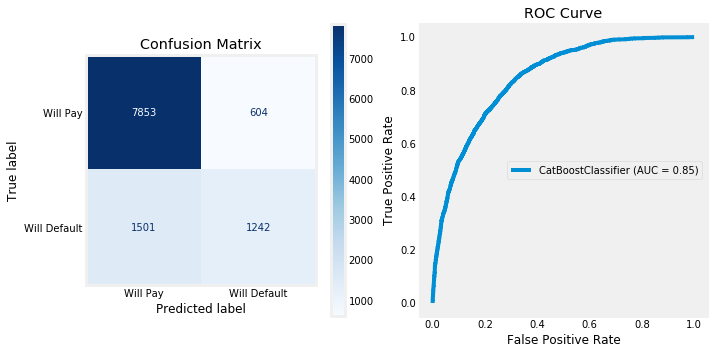

In [36]:
plot(clf_cb)

In [37]:
predictions_cb = np.mean(test_pred_cb, axis=0) + np.std(test_pred_cb, axis=0)
predictions_cb

array([0.31948678, 0.43293793, 0.3831961 , ..., 0.30345162, 0.55440649,
       0.21290887])

In [38]:
print(classification_report(y_test,clf_cb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8457
           1       0.67      0.45      0.54      2743

    accuracy                           0.81     11200
   macro avg       0.76      0.69      0.71     11200
weighted avg       0.80      0.81      0.80     11200



### Submission - All models ensemble!

When you want to purchase a new car, will you walk up to the first car shop and purchase one based on the advice of the dealer? It’s highly unlikely.

You would likely browser a few web portals where people have posted their reviews and compare different car models, checking for their features and prices. You will also probably ask your friends and colleagues for their opinion. In short, you wouldn’t directly reach a conclusion, but will instead make a decision considering the opinions of other people as well.

Ensemble models in machine learning operate on a similar idea. They combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways, but in this model though we will be using the `Weighted Average`

#### Weighted Average
All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people. Let's do the same for our models

In [39]:
sub = pd.read_csv('SampleSubmission.csv')

In [43]:
sub_cb = pd.DataFrame()
sub_cb["default_status"] = predictions_cb

sub_lgb = pd.DataFrame()
sub_lgb["default_status"] = predictions_lgb

sub_xgb = pd.DataFrame()
sub_xgb["default_status"] = predictions_xgb

sub["default_status"] = (sub_cb["default_status"] * 0.87 + sub_lgb["default_status"] * 0.1 +sub_xgb["default_status"] * 0.2)

In [44]:
print(sub.head())
sub.to_csv('sub_cb_lgb_xgb6.csv', index=False)

    Applicant_ID  default_status
0  Apcnt_1000032        0.381395
1  Apcnt_1000048        0.515029
2  Apcnt_1000052        0.457155
3  Apcnt_1000076        0.889130
4  Apcnt_1000080        0.204199


#### Best Model Stack LB :0.844700416...